In [1]:
#Mounting Google Drive to access file in Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Extracting File to access data
import zipfile
import os

zip_file_path = '/content/drive/MyDrive/Insurance Thesis/allianz-hackathon.zip'
zip_ref = zipfile.ZipFile(zip_file_path,'r')
extract_dir = '/content/drive/MyDrive/Insurance Thesis/Extracted_Data'

zip_ref.extractall(extract_dir)

In [4]:
zip_file_path='/content/drive/MyDrive/Insurance Thesis/Extracted_Data/train.csv'

In [5]:
df=pd.read_csv(zip_file_path)

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4500 non-null   int64  
 1   AGE                    4482 non-null   float64
 2   EDUCATION              4500 non-null   object 
 3   OCC                    4500 non-null   object 
 4   PINCODE                4498 non-null   float64
 5   PROD_CATEGORY          4500 non-null   object 
 6   INCOME_SEGMENT         4500 non-null   int64  
 7   PROSPERITY_INDEX_BAND  4500 non-null   object 
 8   QUALITY_SCORE_BAND     4500 non-null   int64  
 9   ISSUANCE_MONTH         4500 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 351.7+ KB


In [7]:
#To identify the number of missing values in each column
missing_values = df.isnull().sum()
missing_values


,0
ID,0
AGE,18
EDUCATION,0
OCC,0
PINCODE,2
PROD_CATEGORY,0
INCOME_SEGMENT,0
PROSPERITY_INDEX_BAND,0
QUALITY_SCORE_BAND,0
ISSUANCE_MONTH,0


In [8]:
#Displaying the number of missing values of all columns

# Calculate the percentage of missing values
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Create a DataFrame to display the results
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})

# Display the DataFrame
missing_data


,Missing Values,Percentage
ID,0,0.000000
AGE,18,0.400000
EDUCATION,0,0.000000
OCC,0,0.000000
PINCODE,2,0.044444
PROD_CATEGORY,0,0.000000
INCOME_SEGMENT,0,0.000000
PROSPERITY_INDEX_BAND,0,0.000000
QUALITY_SCORE_BAND,0,0.000000
ISSUANCE_MONTH,0,0.000000


Missing values are present in the columns AGE and PINCODE, as the number of missing values are less than 0.5%, the rows with missing values can be dropped without much drop in the Information contained.

In [9]:
# Drop rows with missing values in the 'PINCODE' column
df.dropna(subset=['PINCODE'], inplace=True)


In [10]:
#Displaying the number of missing values of all columns

#To identify the number of missing values in each column
missing_values = df.isnull().sum()
missing_values

# Calculate the percentage of missing values
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Create a DataFrame to display the results
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})

# Display the DataFrame
missing_data

,Missing Values,Percentage
ID,0,0.000000
AGE,18,0.400178
EDUCATION,0,0.000000
OCC,0,0.000000
PINCODE,0,0.000000
PROD_CATEGORY,0,0.000000
INCOME_SEGMENT,0,0.000000
PROSPERITY_INDEX_BAND,0,0.000000
QUALITY_SCORE_BAND,0,0.000000
ISSUANCE_MONTH,0,0.000000


In [11]:
# Drop rows with missing values in the 'AGE' column
df.dropna(subset=['AGE'], inplace=True)

# Displaying the number of missing values of all columns
missing_values = df.isnull().sum()
missing_values

# Calculate the percentage of missing values
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Create a DataFrame to display the results
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})

# Display the DataFrame
missing_data


,Missing Values,Percentage
ID,0,0.0
AGE,0,0.0
EDUCATION,0,0.0
OCC,0,0.0
PINCODE,0,0.0
PROD_CATEGORY,0,0.0
INCOME_SEGMENT,0,0.0
PROSPERITY_INDEX_BAND,0,0.0
QUALITY_SCORE_BAND,0,0.0
ISSUANCE_MONTH,0,0.0


In [12]:
df.head()

,ID,AGE,EDUCATION,OCC,PINCODE,PROD_CATEGORY,INCOME_SEGMENT,PROSPERITY_INDEX_BAND,QUALITY_SCORE_BAND,ISSUANCE_MONTH
0,9354,27.0,masters_plus,salaried_pvt,495001.0,trad,5,High,6,Mar-22
1,7823,58.0,graduate_plus,salaried_govt,272001.0,ulip,4,Medium,5,Dec-21
2,6170,52.0,masters_plus,salaried_govt,721101.0,trad,5,High,5,Aug-21
3,9199,52.0,higher_secondary,business,712612.0,trad,3,Medium,2,Mar-22
4,9981,34.0,graduate_plus,salaried_pvt,110085.0,ulip,6,Very_high,6,Mar-22


**Data Description**

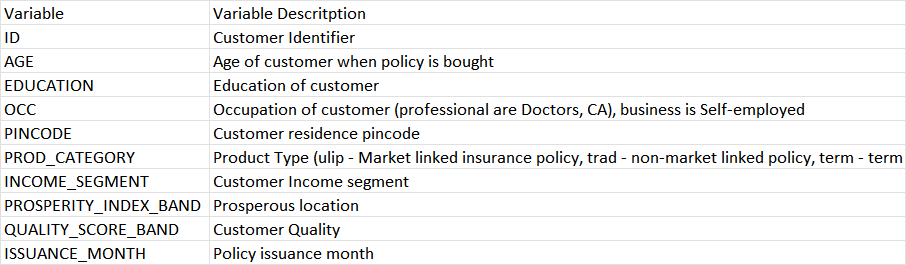

ID: Is only a identifier and hence will be dropped later as it will not hold much information value for model training

**Numerical Variables:**
Age, ISSUANCE_MONTH


**Categorical Variables:**
Education, OCC, PINCODE, PROD_CATEGORY, INCOME_SEGMENT, PROSPERITY_INDEX_BAND, QUALITY_SCORE_BAND,



---



# **Exploratory Data Analysis**

##Univariate Analysis and Missing Data Handling

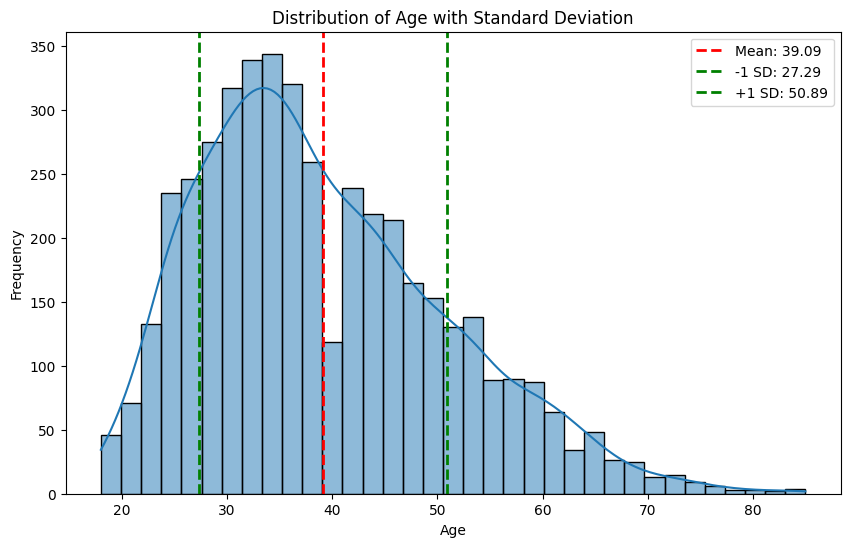

In [13]:
# To analyze the Age of Policy buyers
# Calculate the mean and standard deviation of age
mean_age = df['AGE'].mean()
std_age = df['AGE'].std()

# Define the bounds for the 1st standard deviation
lower_bound = mean_age - std_age
upper_bound = mean_age + std_age

# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['AGE'], kde=True)  # Use seaborn's histplot for better aesthetics

# Add vertical lines for the mean and standard deviation bounds
plt.axvline(mean_age, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_age:.2f}')
plt.axvline(lower_bound, color='green', linestyle='dashed', linewidth=2, label=f'-1 SD: {lower_bound:.2f}')
plt.axvline(upper_bound, color='green', linestyle='dashed', linewidth=2, label=f'+1 SD: {upper_bound:.2f}')

# Customize the plot
plt.title('Distribution of Age with Standard Deviation')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()


The histogram of 'Age' shows that almost 68% of the policy buyers are between the age of 27 and 50 years at the time of buying the policy. With the mean age of 39.1 years.

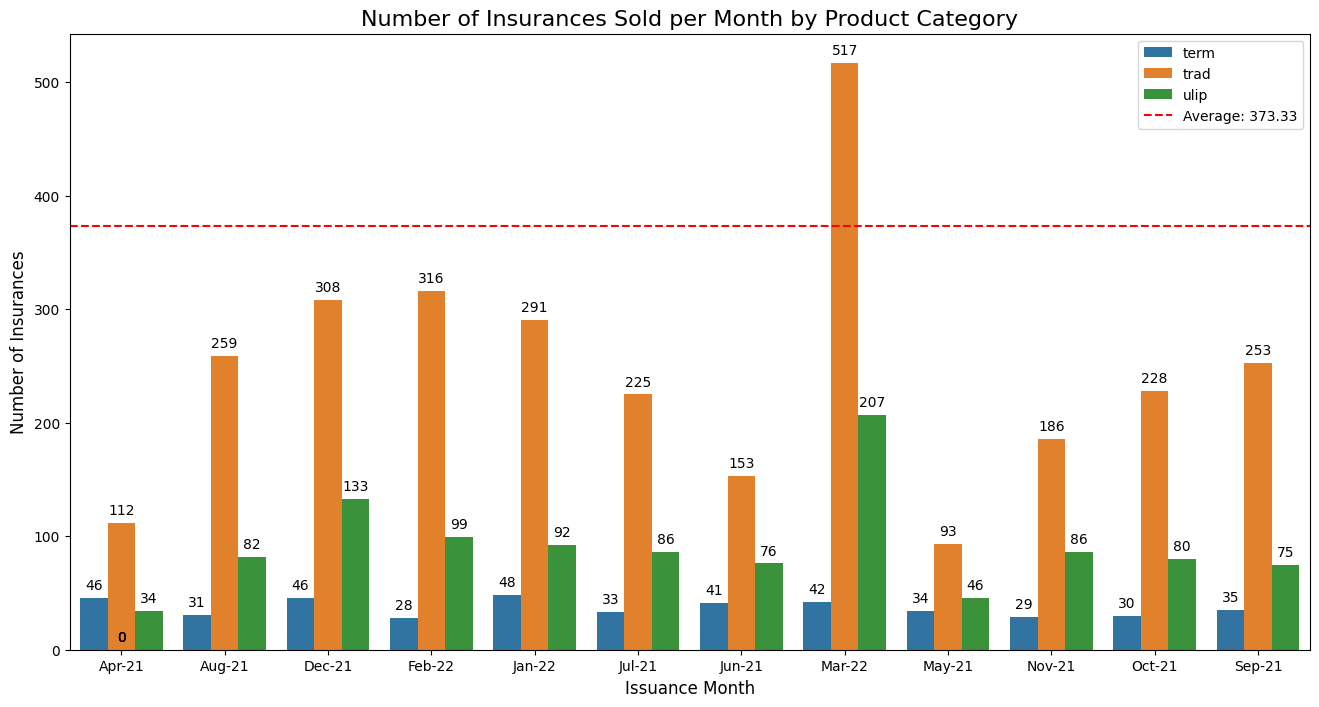

In [14]:
# To Analyse the Policies issued by Issue Month
# To display how many insurances were bought by month by grouping based on "ISSUANCE_MONTH" on a bar graphs. Also display the numbers on the graph. Can you add hue of "PROD_CATEGORY". Display a line with Average number of insurance bought over the time period for all type of insurance products purchased, do not take average for different "PROD_CATEGORY" .

# Group the data by issuance month and product category, then count the number of insurances
insurance_counts = df.groupby(['ISSUANCE_MONTH', 'PROD_CATEGORY'])['ID'].count().reset_index()

# Calculate the overall average number of insurances sold per month
average_insurance = df.groupby('ISSUANCE_MONTH')['ID'].count().mean()

# Create the bar plot
plt.figure(figsize=(16, 8))
g = sns.barplot(x='ISSUANCE_MONTH', y='ID', hue='PROD_CATEGORY', data=insurance_counts)
plt.title('Number of Insurances Sold per Month by Product Category', fontsize=16)
plt.xlabel('Issuance Month', fontsize=12)
plt.ylabel('Number of Insurances', fontsize=12)

# Add value annotations to the bars
for p in g.patches:
    g.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')

# Add a line representing the overall average
plt.axhline(y=average_insurance, color='red', linestyle='--', label=f'Average: {average_insurance:.2f}')
plt.legend()
plt.show()

From the above Graph, we see that on an average 373 insurance products were issued over the time period of study.
Traditional Type of insurance product was issued the most across all months for the duration of the study.
ULIP type of insurance product was the next most issued product across all months of the study except April 2021.

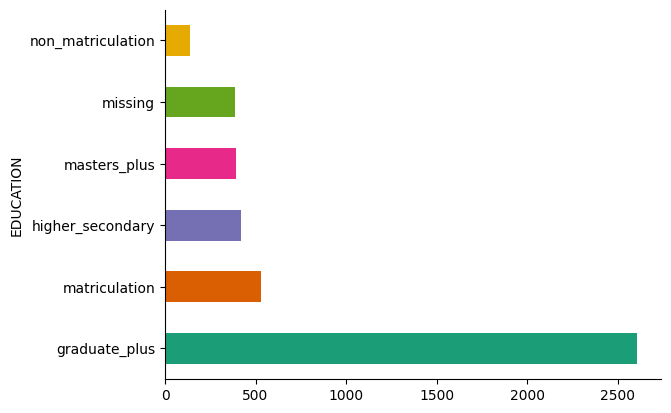

In [15]:
# Sort the values by their counts in descending order
education_counts = df.groupby('EDUCATION').size().sort_values(ascending=False)

# Create the horizontal bar plot with sorted values
education_counts.plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()


In [16]:
# Calculate the percentage of each category
education_percentages = df.groupby('EDUCATION').size() / len(df) * 100

# Round the percentages to 2 decimal places
education_percentages = education_percentages.round(2)

# Create a DataFrame for better presentation
percentage_table = pd.DataFrame({'EDUCATION': education_percentages.index, 'Percentage': education_percentages.values})

# Display the table
percentage_table


,EDUCATION,Percentage
0,graduate_plus,58.24
1,higher_secondary,9.35
2,masters_plus,8.77
3,matriculation,11.83
4,missing,8.68
5,non_matriculation,3.12


It can be seen that that a majority of the people buying insurance have a Graduate Plus education level. Indicating that education, more importantly awareness, of people plays a major role in people buying insurance products and thus the penetration of insurance products is predominantly among the educated individuals.<br>  It also highlights that Bajaj Allianz may develop products aimed at capturing markets beyond the educated individuals for further expansion of the market. This may be done by either market expansion strategies or by developing product expansion strategies that are aimed towards less educated individuals.

Further there are about 10% of customers where the Education details are missing, these values are to be handled before further Anlaysis.

**Handling "missing" values in Education**

In [17]:
df_edu_miss=df[df.EDUCATION=='missing']
df_edu_miss

,ID,AGE,EDUCATION,OCC,PINCODE,PROD_CATEGORY,INCOME_SEGMENT,PROSPERITY_INDEX_BAND,QUALITY_SCORE_BAND,ISSUANCE_MONTH
5,7972,62.0,missing,missing,311001.0,trad,3,High,2,Dec-21
18,8283,60.0,missing,retired,380059.0,trad,4,Very_high,3,Jan-22
25,5494,35.0,missing,missing,121001.0,term,4,High,3,Jun-21
34,7318,54.0,missing,business,700129.0,trad,4,Medium,2,Nov-21
53,6630,61.0,missing,retired,206001.0,trad,3,High,2,Sep-21
...,...,...,...,...,...,...,...,...,...,...
4429,6401,63.0,missing,agriculture,147105.0,trad,2,Very_low,1,Aug-21
4459,5708,62.0,missing,agriculture,250001.0,trad,8,High,2,Jul-21
4477,7929,69.0,missing,housewife,700005.0,trad,4,High,2,Dec-21
4485,5552,33.0,missing,business,263139.0,ulip,2,High,3,Jun-21


In [18]:
# Count the occurrences of each value in the 'OCC' column of df_edu_miss
occ_counts = df_edu_miss['OCC'].value_counts()
occ_counts

,count
OCC,
business,176
retired,73
salaried_govt,41
salaried_pvt,31
agriculture,24
professional,23
missing,12
housewife,9


Records where OCC and EDUCATION are missing can be dropped.

In [19]:
# Display number of records in df and df_edu_miss before the operation
print("Number of records in df before dropping:", len(df))
print("Number of records in df_edu_miss before dropping:", len(df_edu_miss))

# Drop values where OCC and EDUCATION is "missing"
df = df[~((df['OCC'] == 'missing') & (df['EDUCATION'] == 'missing'))]
df_edu_miss = df_edu_miss[~((df_edu_miss['OCC'] == 'missing') & (df_edu_miss['EDUCATION'] == 'missing'))]

# Display number of records in df and df_edu_miss after the operation
print("Number of records in df after dropping:", len(df))
print("Number of records in df_edu_miss after dropping:", len(df_edu_miss))


Number of records in df before dropping: 4480
Number of records in df_edu_miss before dropping: 389
Number of records in df after dropping: 4468
Number of records in df_edu_miss after dropping: 377


In [20]:
# Count the occurrences of each value in the 'OCC' column of df_edu_miss
occ_counts = df_edu_miss['OCC'].value_counts()
occ_counts

,count
OCC,
business,176
retired,73
salaried_govt,41
salaried_pvt,31
agriculture,24
professional,23
housewife,9


Assuming that all professional, Salaried_govt and Salaried_pvt are atleast "graduate_plus" which is usually a prerequisite.

In [21]:
# Define the list of OCC values to consider
occ_values = ['salaried_govt', 'salaried_pvt', 'professional']

# Replace EDUCATION with 'graduate_plus' in both dataframes for matching conditions
for value in occ_values:
    df.loc[(df['EDUCATION'] == 'missing') & (df['OCC'] == value), 'EDUCATION'] = 'graduate_plus'
    df_edu_miss.loc[(df_edu_miss['EDUCATION'] == 'missing') & (df_edu_miss['OCC'] == value), 'EDUCATION'] = 'graduate_plus'


In [22]:
#Update df_edu_miss
df_edu_miss=df[df.EDUCATION=='missing']
df_edu_miss

,ID,AGE,EDUCATION,OCC,PINCODE,PROD_CATEGORY,INCOME_SEGMENT,PROSPERITY_INDEX_BAND,QUALITY_SCORE_BAND,ISSUANCE_MONTH
18,8283,60.0,missing,retired,380059.0,trad,4,Very_high,3,Jan-22
34,7318,54.0,missing,business,700129.0,trad,4,Medium,2,Nov-21
53,6630,61.0,missing,retired,206001.0,trad,3,High,2,Sep-21
66,9123,55.0,missing,business,700086.0,ulip,6,High,3,Feb-22
69,8786,68.0,missing,retired,121003.0,trad,5,Very_high,3,Feb-22
...,...,...,...,...,...,...,...,...,...,...
4429,6401,63.0,missing,agriculture,147105.0,trad,2,Very_low,1,Aug-21
4459,5708,62.0,missing,agriculture,250001.0,trad,8,High,2,Jul-21
4477,7929,69.0,missing,housewife,700005.0,trad,4,High,2,Dec-21
4485,5552,33.0,missing,business,263139.0,ulip,2,High,3,Jun-21


In [23]:
# Calculate the percentage of each category
education_percentages = df.groupby('EDUCATION').size() / len(df) * 100

# Round the percentages to 2 decimal places
education_percentages = education_percentages.round(2)

# Create a DataFrame for better presentation
percentage_table = pd.DataFrame({'EDUCATION': education_percentages.index, 'Percentage': education_percentages.values})

# Display the table
percentage_table


,EDUCATION,Percentage
0,graduate_plus,60.52
1,higher_secondary,9.38
2,masters_plus,8.80
3,matriculation,11.86
4,missing,6.31
5,non_matriculation,3.13


In [24]:
# Count the occurrences of each value in the 'OCC' column of df_edu_miss
occ_counts = df_edu_miss['OCC'].value_counts()
occ_counts

,count
OCC,
business,176
retired,73
agriculture,24
housewife,9


Assuming that all retired are atleast "graduate_plus" which will be because the retirees have to be employed in a job before

In [25]:
# Define the list of OCC values to consider
occ_values = ['retired']

# Replace EDUCATION with 'graduate_plus' in both dataframes for matching conditions
for value in occ_values:
    df.loc[(df['EDUCATION'] == 'missing') & (df['OCC'] == value), 'EDUCATION'] = 'graduate_plus'
    df_edu_miss.loc[(df_edu_miss['EDUCATION'] == 'missing') & (df_edu_miss['OCC'] == value), 'EDUCATION'] = 'graduate_plus'


In [26]:
#Update df_edu_miss
df_edu_miss=df[df.EDUCATION=='missing']
df_edu_miss

,ID,AGE,EDUCATION,OCC,PINCODE,PROD_CATEGORY,INCOME_SEGMENT,PROSPERITY_INDEX_BAND,QUALITY_SCORE_BAND,ISSUANCE_MONTH
34,7318,54.0,missing,business,700129.0,trad,4,Medium,2,Nov-21
66,9123,55.0,missing,business,700086.0,ulip,6,High,3,Feb-22
88,7740,69.0,missing,agriculture,721253.0,trad,2,Medium,2,Dec-21
162,9784,61.0,missing,business,341505.0,trad,6,High,3,Mar-22
182,6822,52.0,missing,business,821308.0,trad,3,Medium,2,Sep-21
...,...,...,...,...,...,...,...,...,...,...
4429,6401,63.0,missing,agriculture,147105.0,trad,2,Very_low,1,Aug-21
4459,5708,62.0,missing,agriculture,250001.0,trad,8,High,2,Jul-21
4477,7929,69.0,missing,housewife,700005.0,trad,4,High,2,Dec-21
4485,5552,33.0,missing,business,263139.0,ulip,2,High,3,Jun-21


In [27]:
# Calculate the percentage of each category
education_percentages = df.groupby('EDUCATION').size() / len(df) * 100

# Round the percentages to 2 decimal places
education_percentages = education_percentages.round(2)

# Create a DataFrame for better presentation
percentage_table = pd.DataFrame({'EDUCATION': education_percentages.index, 'Percentage': education_percentages.values})

# Display the table
percentage_table


,EDUCATION,Percentage
0,graduate_plus,62.15
1,higher_secondary,9.38
2,masters_plus,8.80
3,matriculation,11.86
4,missing,4.68
5,non_matriculation,3.13


Now the Percentage of missing in education is less than 5%

In [28]:
# Calculate the percentage distribution of 'OCC' in df_edu_miss
occ_percentages = df_edu_miss['OCC'].value_counts(normalize=True) * 100
occ_percentages


,proportion
OCC,
business,84.210526
agriculture,11.483254
housewife,4.306220


Since there are only three occupations, these can be implied by taking the mode value of education for each of these Occupations from the original dataset(without the missing Education values)

In [29]:
# Filter out rows where EDUCATION is "missing"
df_filtered = df[df['EDUCATION'] != 'missing']

# Group by EDUCATION and OCC, then calculate the percentage distribution
occ_percentage_by_education = df_filtered.groupby(['EDUCATION', 'OCC']).size().unstack(fill_value=0)

# Normalize each column to sum to 100%
occ_percentage_by_education = occ_percentage_by_education.div(occ_percentage_by_education.sum(axis=0), axis=1) * 100

# Display the resulting DataFrame
occ_percentage_by_education


OCC,agriculture,business,housewife,missing,professional,retired,salaried,salaried_govt,salaried_pvt,student
EDUCATION,,,,,,,,,,
graduate_plus,32.844575,63.678044,63.461538,54.545455,65.098039,87.786260,100.0,73.058252,72.585097,66.666667
higher_secondary,18.768328,13.041263,15.384615,27.272727,7.450980,2.290076,0.0,6.553398,3.495860,16.666667
masters_plus,2.639296,4.482934,3.846154,18.181818,18.431373,2.290076,0.0,14.320388,16.835327,0.000000
matriculation,30.498534,15.282731,7.692308,0.000000,7.450980,5.343511,0.0,5.825243,6.623735,0.000000
non_matriculation,15.249267,3.515028,9.615385,0.000000,1.568627,2.290076,0.0,0.242718,0.459982,16.666667


From the above table it is assumed that for housewife the prominent EDUCATION is graduate_plus. Similarly for agriculture and business it is graduate_plus

In [30]:
# prompt: For df_edu_miss and df, where EDUCATION is "missing" and OCC is any of the following (business or agriculture or housewife), update the EDUCATION as graduate_plus

# Define the list of OCC values to consider
occ_values = ['business', 'agriculture', 'housewife']

# Replace EDUCATION with 'graduate_plus' in df for matching conditions
for value in occ_values:
    df.loc[(df['EDUCATION'] == 'missing') & (df['OCC'] == value), 'EDUCATION'] = 'graduate_plus'
    df_edu_miss.loc[(df_edu_miss['EDUCATION'] == 'missing') & (df_edu_miss['OCC'] == value), 'EDUCATION'] = 'graduate_plus'


In [31]:
# Calculate the percentage of each category
education_percentages = df.groupby('EDUCATION').size() / len(df) * 100

# Round the percentages to 2 decimal places
education_percentages = education_percentages.round(2)

# Create a DataFrame for better presentation
percentage_table = pd.DataFrame({'EDUCATION': education_percentages.index, 'Percentage': education_percentages.values})

# Display the table
percentage_table

,EDUCATION,Percentage
0,graduate_plus,66.83
1,higher_secondary,9.38
2,masters_plus,8.80
3,matriculation,11.86
4,non_matriculation,3.13


All missing values in the Education parameter are now handled



---



In [32]:
df.head()

,ID,AGE,EDUCATION,OCC,PINCODE,PROD_CATEGORY,INCOME_SEGMENT,PROSPERITY_INDEX_BAND,QUALITY_SCORE_BAND,ISSUANCE_MONTH
0,9354,27.0,masters_plus,salaried_pvt,495001.0,trad,5,High,6,Mar-22
1,7823,58.0,graduate_plus,salaried_govt,272001.0,ulip,4,Medium,5,Dec-21
2,6170,52.0,masters_plus,salaried_govt,721101.0,trad,5,High,5,Aug-21
3,9199,52.0,higher_secondary,business,712612.0,trad,3,Medium,2,Mar-22
4,9981,34.0,graduate_plus,salaried_pvt,110085.0,ulip,6,Very_high,6,Mar-22


OCC
business         47.87
salaried_pvt     24.33
salaried_govt     9.22
agriculture       8.17
professional      5.71
retired           2.93
housewife         1.37
missing           0.25
student           0.13
salaried          0.02
Name: proportion, dtype: float64


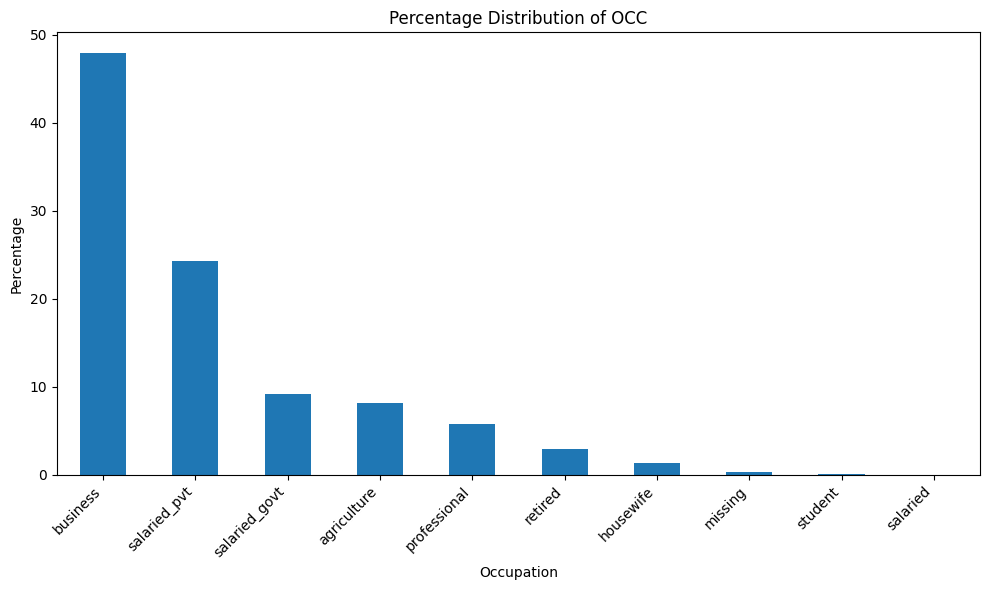

In [33]:
# Calculate the percentage distribution of 'OCC'
occ_percentages = df['OCC'].value_counts(normalize=True) * 100

# Round the percentages to 2 decimal places
occ_percentages = occ_percentages.round(2)

# Print the percentage distribution
print(occ_percentages)

# Create a bar plot to visualize the distribution
plt.figure(figsize=(10, 6))
occ_percentages.plot(kind='bar')
plt.title('Percentage Distribution of OCC')
plt.xlabel('Occupation')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout() #Adjust layout to prevent labels from overlapping
plt.show()

As the "missing" OCC are less than 0.25% of the values these can be dropped without significant loss of information value

In [34]:
# Dropping  rows where OCC is "missing"
df = df[df['OCC'] != 'missing']

OCC
business         47.99
salaried_pvt     24.39
salaried_govt     9.24
agriculture       8.19
professional      5.72
retired           2.94
housewife         1.37
student           0.13
salaried          0.02
Name: proportion, dtype: float64


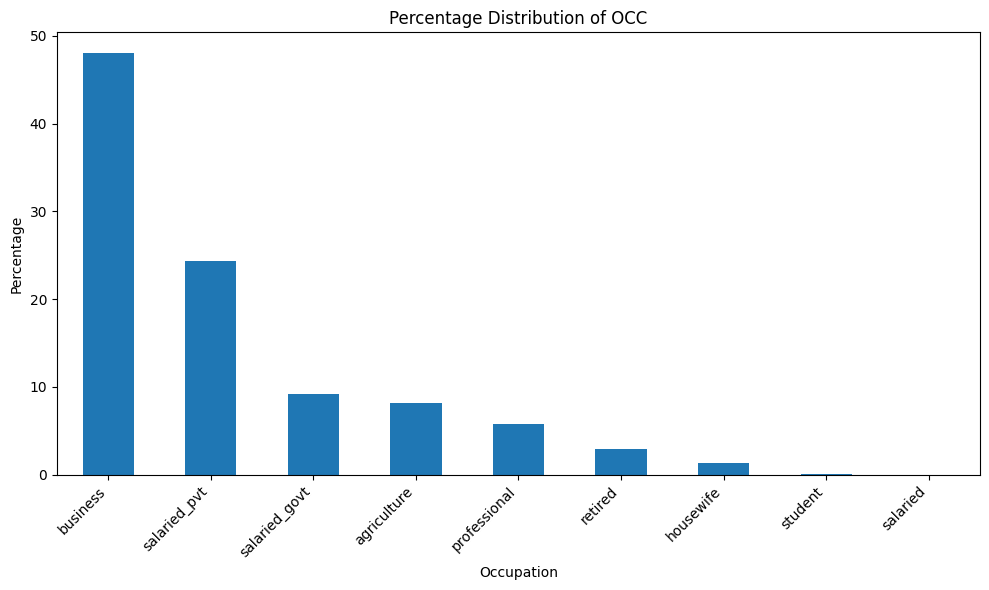

In [35]:
# Calculate the percentage distribution of 'OCC'
occ_percentages = df['OCC'].value_counts(normalize=True) * 100

# Round the percentages to 2 decimal places
occ_percentages = occ_percentages.round(2)

# Print the percentage distribution
print(occ_percentages)

# Create a bar plot to visualize the distribution
plt.figure(figsize=(10, 6))
occ_percentages.plot(kind='bar')
plt.title('Percentage Distribution of OCC')
plt.xlabel('Occupation')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout() #Adjust layout to prevent labels from overlapping
plt.show()

OCC
business         47.99
salaried_pvt     24.39
salaried_govt     9.24
agriculture       8.19
professional      5.72
retired           2.94
housewife         1.37
student           0.13
salaried          0.02
Name: proportion, dtype: float64


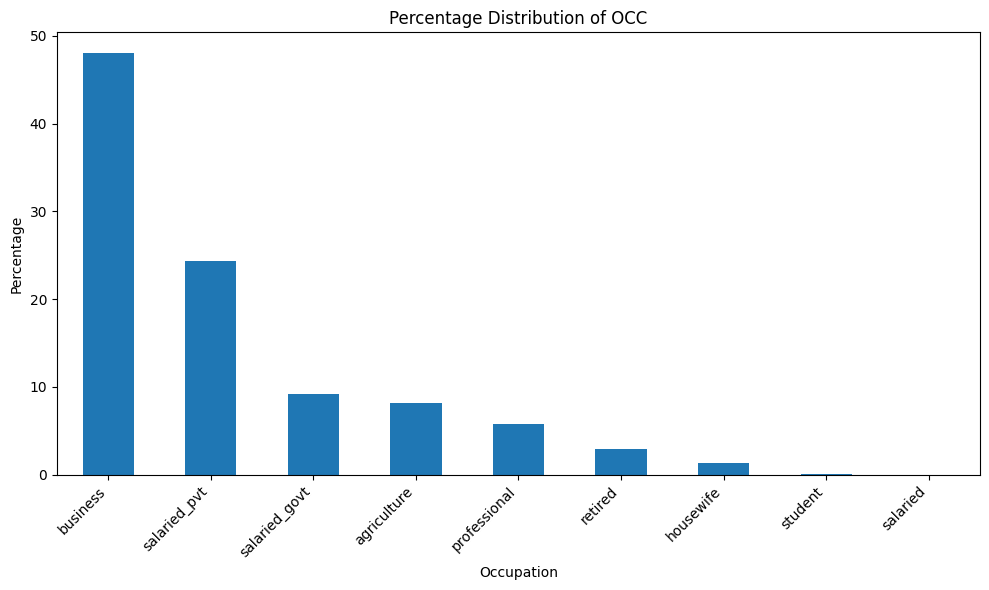

In [36]:
# Calculate the percentage distribution of 'OCC'
occ_percentages = df['OCC'].value_counts(normalize=True) * 100

# Round the percentages to 2 decimal places
occ_percentages = occ_percentages.round(2)

# Print the percentage distribution
print(occ_percentages)

# Create a bar plot to visualize the distribution
plt.figure(figsize=(10, 6))
occ_percentages.plot(kind='bar')
plt.title('Percentage Distribution of OCC')
plt.xlabel('Occupation')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout() #Adjust layout to prevent labels from overlapping
plt.show()

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4457 entries, 0 to 4499
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4457 non-null   int64  
 1   AGE                    4457 non-null   float64
 2   EDUCATION              4457 non-null   object 
 3   OCC                    4457 non-null   object 
 4   PINCODE                4457 non-null   float64
 5   PROD_CATEGORY          4457 non-null   object 
 6   INCOME_SEGMENT         4457 non-null   int64  
 7   PROSPERITY_INDEX_BAND  4457 non-null   object 
 8   QUALITY_SCORE_BAND     4457 non-null   int64  
 9   ISSUANCE_MONTH         4457 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 383.0+ KB


Pincode is stored as float, it should actually be a string

In [38]:
# Convert 'PINCODE' column to string type
df['PINCODE'] = df['PINCODE'].astype(str)

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 4457 entries, 0 to 4499
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4457 non-null   int64  
 1   AGE                    4457 non-null   float64
 2   EDUCATION              4457 non-null   object 
 3   OCC                    4457 non-null   object 
 4   PINCODE                4457 non-null   object 
 5   PROD_CATEGORY          4457 non-null   object 
 6   INCOME_SEGMENT         4457 non-null   int64  
 7   PROSPERITY_INDEX_BAND  4457 non-null   object 
 8   QUALITY_SCORE_BAND     4457 non-null   int64  
 9   ISSUANCE_MONTH         4457 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 383.0+ KB


PROD_CATEGORY
trad    65.69
ulip    24.43
term     9.87
Name: proportion, dtype: float64


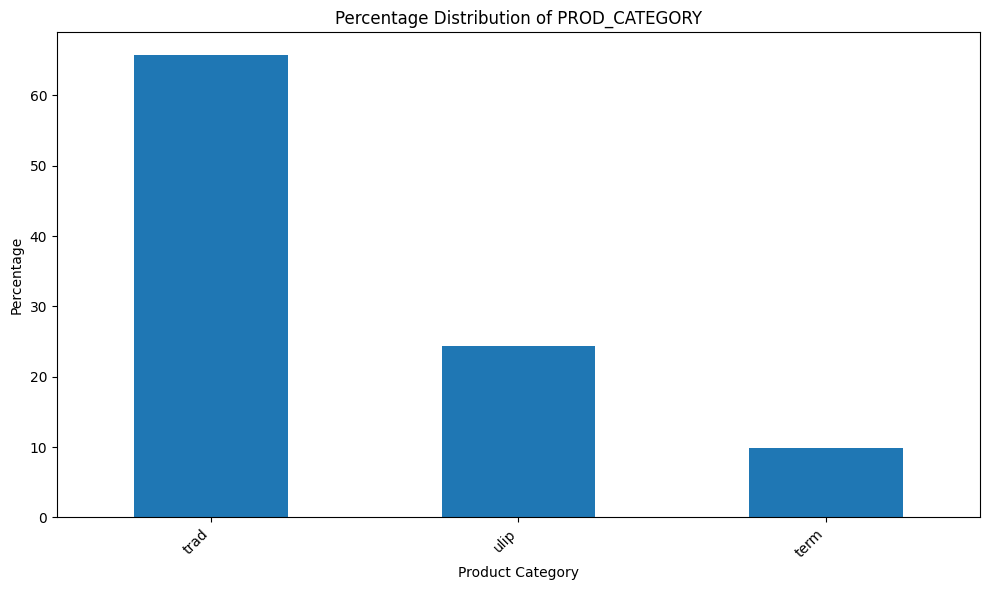

In [39]:
# Calculate the percentage distribution of 'PROD_CATEGORY'
prod_category_percentages = df['PROD_CATEGORY'].value_counts(normalize=True) * 100

# Round the percentages to 2 decimal places
prod_category_percentages = prod_category_percentages.round(2)

# Print the percentage distribution
print(prod_category_percentages)

# Create a bar plot to visualize the distribution
plt.figure(figsize=(10, 6))
prod_category_percentages.plot(kind='bar')
plt.title('Percentage Distribution of PROD_CATEGORY')
plt.xlabel('Product Category')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

This is the target Variable, as the data contains more than 60% as traditional type of insurance, this should later be handled by respective sampling techniques to ensure the model performance is not compromised

INCOME_SEGMENT
 3     25.53
 4     20.53
 5     16.11
 2     15.17
 6      9.38
 7      5.52
 1      4.24
 8      1.79
 9      1.14
 10     0.36
-99     0.22
Name: proportion, dtype: float64


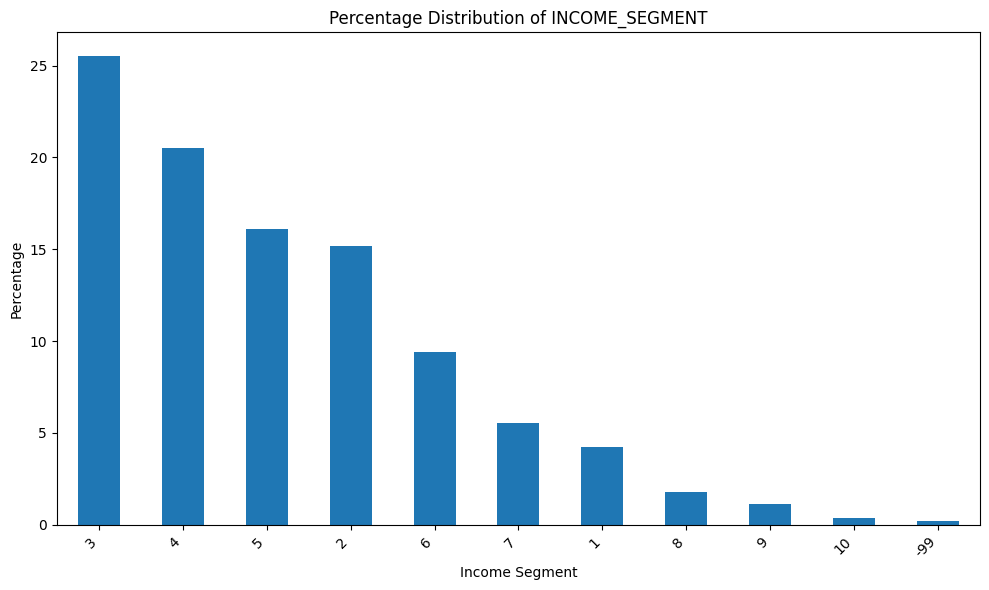

In [40]:
# Calculate the percentage distribution of 'INCOME_SEGMENT'
income_segment_percentages = df['INCOME_SEGMENT'].value_counts(normalize=True) * 100

# Round the percentages to 2 decimal places
income_segment_percentages = income_segment_percentages.round(2)

# Print the percentage distribution
print(income_segment_percentages)

# Create a bar plot to visualize the distribution
plt.figure(figsize=(10, 6))
income_segment_percentages.plot(kind='bar')
plt.title('Percentage Distribution of INCOME_SEGMENT')
plt.xlabel('Income Segment')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


As the missing values for Income segment is less than 0.22%, these can be dropped without much loss in overall information value.

In [41]:
# Dropping  rows where OCC is "missing"
df = df[df['INCOME_SEGMENT'] != -99 ]

INCOME_SEGMENT
3     25.59
4     20.58
5     16.15
2     15.20
6      9.40
7      5.53
1      4.25
8      1.80
9      1.15
10     0.36
Name: proportion, dtype: float64


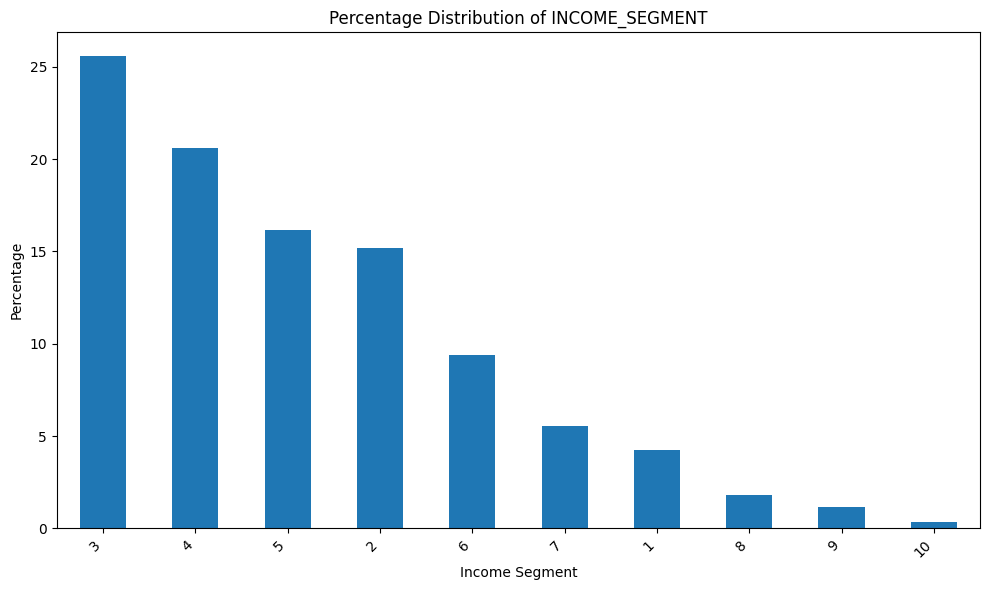

In [42]:
# Calculate the percentage distribution of 'INCOME_SEGMENT'
income_segment_percentages = df['INCOME_SEGMENT'].value_counts(normalize=True) * 100

# Round the percentages to 2 decimal places
income_segment_percentages = income_segment_percentages.round(2)

# Print the percentage distribution
print(income_segment_percentages)

# Create a bar plot to visualize the distribution
plt.figure(figsize=(10, 6))
income_segment_percentages.plot(kind='bar')
plt.title('Percentage Distribution of INCOME_SEGMENT')
plt.xlabel('Income Segment')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


PROSPERITY_INDEX_BAND
Medium       36.16
High         31.21
Very_high    20.46
Low           5.01
Very_low      4.88
Missing       2.27
Name: proportion, dtype: float64


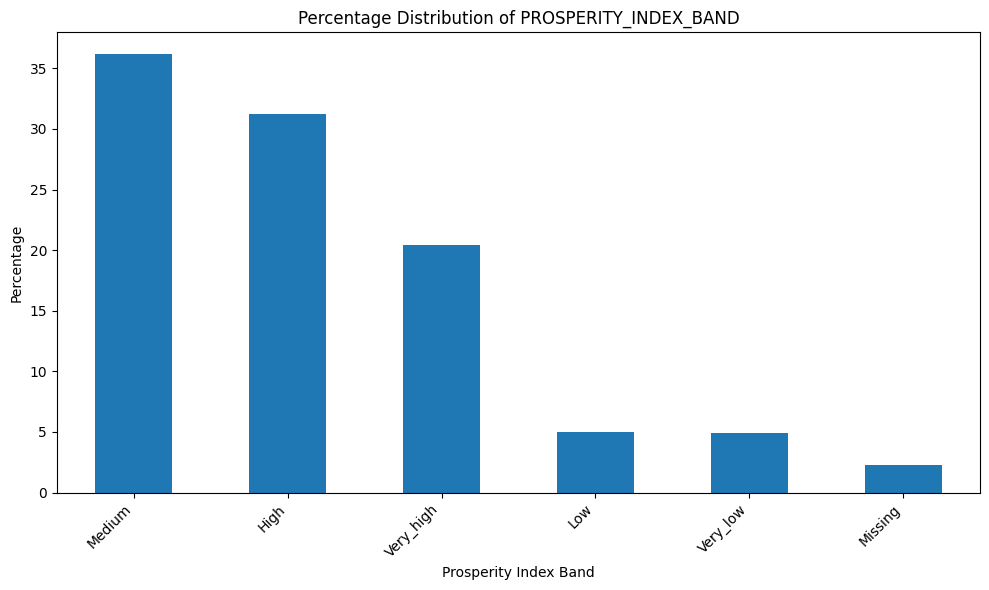

In [43]:
# Calculate the percentage distribution of 'PROSPERITY_INDEX_BAND'
prosperity_index_percentages = df['PROSPERITY_INDEX_BAND'].value_counts(normalize=True) * 100

# Round the percentages to 2 decimal places
prosperity_index_percentages = prosperity_index_percentages.round(2)

# Print the percentage distribution
print(prosperity_index_percentages)

# Create a bar plot to visualize the distribution
plt.figure(figsize=(10, 6))
prosperity_index_percentages.plot(kind='bar')
plt.title('Percentage Distribution of PROSPERITY_INDEX_BAND')
plt.xlabel('Prosperity Index Band')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


In [44]:
# Create a subset of the DataFrame where 'PROSPERITY_INDEX_BAND' is "Missing"
df_missing_prosperity = df[df['PROSPERITY_INDEX_BAND'] == 'Missing']

# Display the subset
df_missing_prosperity


,ID,AGE,EDUCATION,OCC,PINCODE,PROD_CATEGORY,INCOME_SEGMENT,PROSPERITY_INDEX_BAND,QUALITY_SCORE_BAND,ISSUANCE_MONTH
16,5879,28.0,graduate_plus,salaried_pvt,733153.0,trad,3,Missing,4,Jul-21
23,9932,43.0,masters_plus,business,110022.0,trad,5,Missing,3,Mar-22
26,7980,48.0,higher_secondary,salaried_govt,207505.0,trad,3,Missing,3,Dec-21
30,9513,41.0,masters_plus,salaried_govt,484001.0,trad,5,Missing,4,Mar-22
33,8189,35.0,masters_plus,salaried_pvt,202390.0,term,5,Missing,5,Jan-22
...,...,...,...,...,...,...,...,...,...,...
4233,5113,43.0,matriculation,business,841221.0,trad,3,Missing,2,Apr-21
4238,6787,60.0,matriculation,business,811307.0,ulip,7,Missing,2,Sep-21
4257,5368,22.0,graduate_plus,business,515511.0,trad,3,Missing,3,May-21
4305,6480,29.0,higher_secondary,business,814112.0,trad,3,Missing,2,Aug-21


In [45]:
# Create a DataFrame containing only the 'PINCODE' and 'PROSPERITY_INDEX_BAND' columns
# where 'PROSPERITY_INDEX_BAND' is not equal to 'Missing'
df_filtered = df[df['PROSPERITY_INDEX_BAND'] != 'Missing'][['PINCODE', 'PROSPERITY_INDEX_BAND']]

df_filtered


,PINCODE,PROSPERITY_INDEX_BAND
0,495001.0,High
1,272001.0,Medium
2,721101.0,High
3,712612.0,Medium
4,110085.0,Very_high
...,...,...
4495,851212.0,Medium
4496,388620.0,High
4497,232101.0,Medium
4498,121001.0,High


In [46]:
# Create a mapping of PINCODE to PROSPERITY_INDEX_BAND from df_filtered
pincode_mapping = df_filtered.set_index('PINCODE')['PROSPERITY_INDEX_BAND'].to_dict()

# Impute missing PROSPERITY_INDEX_BAND values in df_missing_prosperity
for index, row in df_missing_prosperity.iterrows():
  pincode = row['PINCODE']
  if pincode in pincode_mapping:
    df.loc[index, 'PROSPERITY_INDEX_BAND'] = pincode_mapping[pincode]

# Check for any remaining missing values in PROSPERITY_INDEX_BAND
remaining_missing = (df['PROSPERITY_INDEX_BAND'] == 'Missing').sum()
print(f"Number of remaining 'Missing' values in 'PROSPERITY_INDEX_BAND': {remaining_missing}")


Number of remaining 'Missing' values in 'PROSPERITY_INDEX_BAND': 101


We see that none of the PROSPERITY_INDEX_BAND can be implied based on the PINCODES, hence we can drop the "Missing" values in the PROSPERITY_INDEX_BAND

In [47]:
# Drop rows where 'PROSPERITY_INDEX_BAND' is 'Missing'
df = df[df['PROSPERITY_INDEX_BAND'] != 'Missing']


PROSPERITY_INDEX_BAND
Medium       37.00
High         31.94
Very_high    20.94
Low           5.13
Very_low      4.99
Name: proportion, dtype: float64


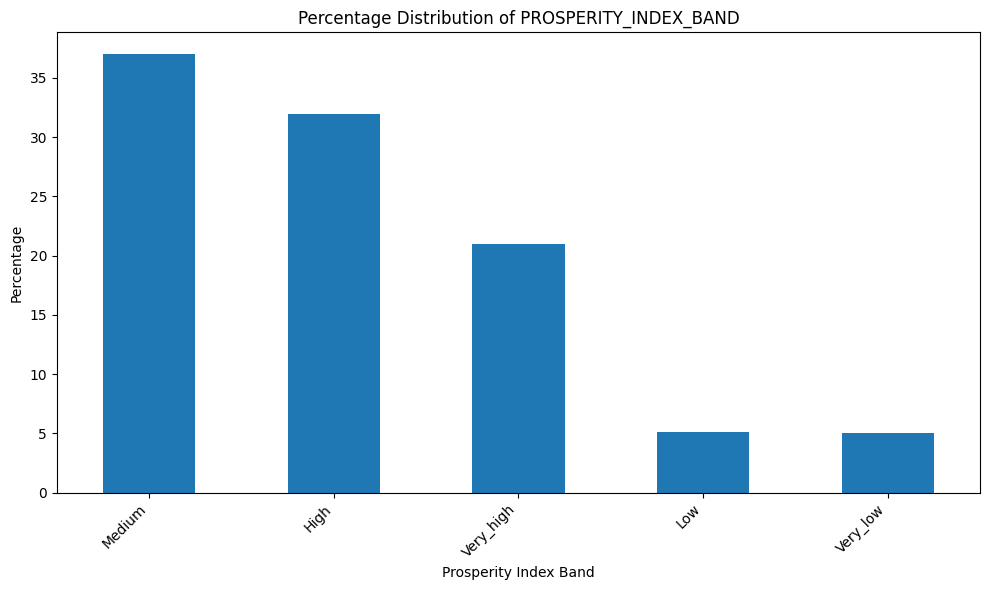

In [48]:
# Calculate the percentage distribution of 'PROSPERITY_INDEX_BAND'
prosperity_index_percentages = df['PROSPERITY_INDEX_BAND'].value_counts(normalize=True) * 100

# Round the percentages to 2 decimal places
prosperity_index_percentages = prosperity_index_percentages.round(2)

# Print the percentage distribution
print(prosperity_index_percentages)

# Create a bar plot to visualize the distribution
plt.figure(figsize=(10, 6))
prosperity_index_percentages.plot(kind='bar')
plt.title('Percentage Distribution of PROSPERITY_INDEX_BAND')
plt.xlabel('Prosperity Index Band')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


QUALITY_SCORE_BAND
4    32.72
5    26.83
3    18.59
2    12.84
6     8.70
1     0.32
Name: proportion, dtype: float64


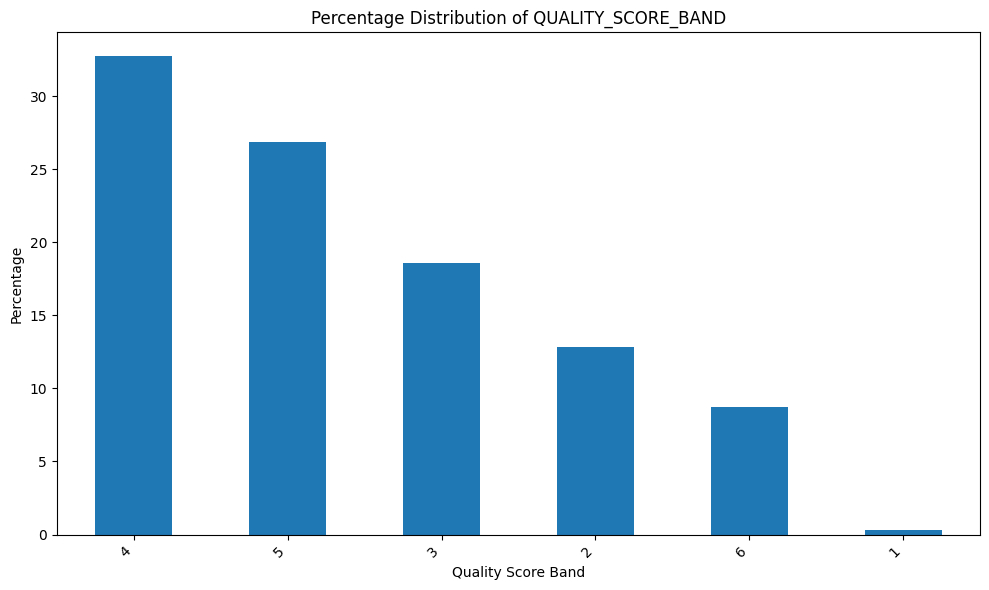

In [49]:
# Calculate the percentage distribution of 'QUALITY_SCORE_BAND'
quality_score_percentages = df['QUALITY_SCORE_BAND'].value_counts(normalize=True) * 100

# Round the percentages to 2 decimal places
quality_score_percentages = quality_score_percentages.round(2)

# Print the percentage distribution
print(quality_score_percentages)

# Create a bar plot to visualize the distribution
plt.figure(figsize=(10, 6))
quality_score_percentages.plot(kind='bar')
plt.title('Percentage Distribution of QUALITY_SCORE_BAND')
plt.xlabel('Quality Score Band')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


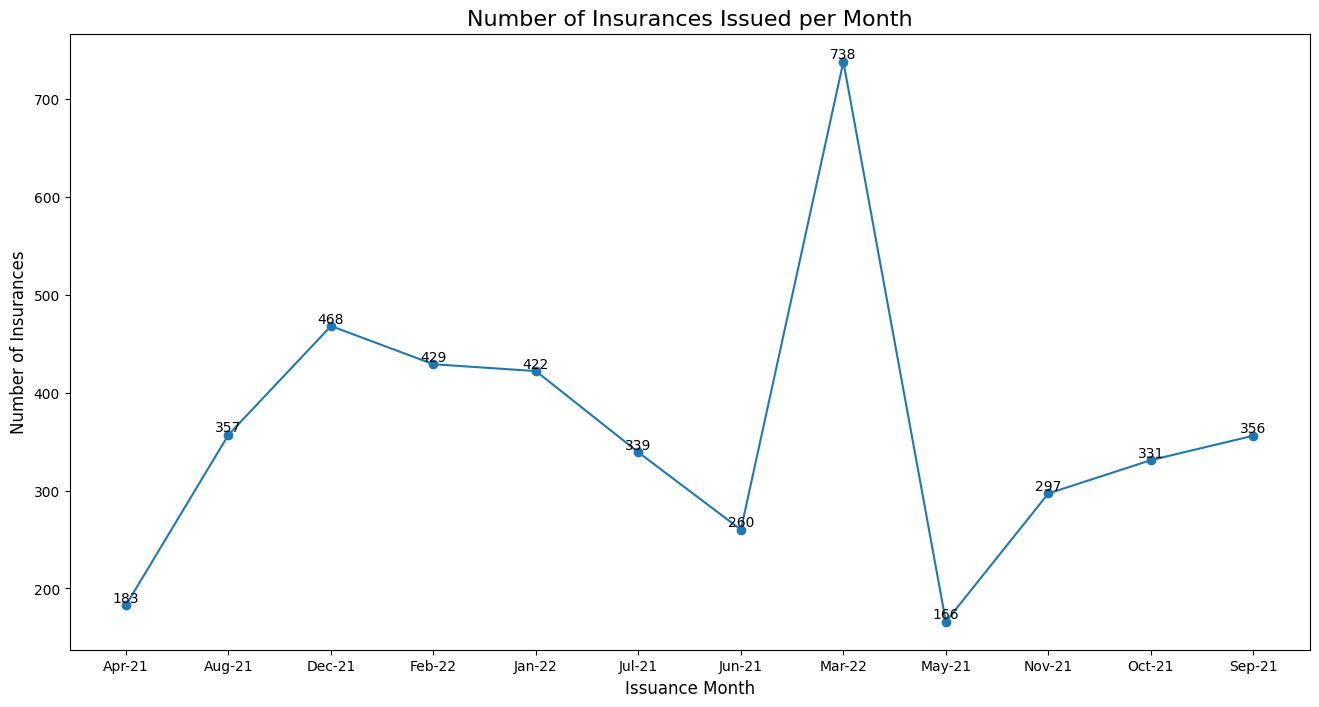

In [50]:
# Group the data by issuance month and count the number of insurances
insurance_counts_month = df.groupby('ISSUANCE_MONTH')['ID'].count()

# Create the line plot
plt.figure(figsize=(16, 8))
plt.plot(insurance_counts_month.index, insurance_counts_month.values, marker='o')
plt.title('Number of Insurances Issued per Month', fontsize=16)
plt.xlabel('Issuance Month', fontsize=12)
plt.ylabel('Number of Insurances', fontsize=12)

# Add value annotations to the points
for i, count in enumerate(insurance_counts_month.values):
    plt.annotate(str(count), xy=(insurance_counts_month.index[i], count), ha='center', va='bottom')

plt.show()

We see that maximum number of insurance products were issued in the month of March 2022.

In [51]:
# Assuming df is your DataFrame as defined in the provided code.
unique_issuance_months = sorted(df['ISSUANCE_MONTH'].unique())
unique_issuance_months


['Apr-21',
 'Aug-21',
 'Dec-21',
 'Feb-22',
 'Jan-22',
 'Jul-21',
 'Jun-21',
 'Mar-22',
 'May-21',
 'Nov-21',
 'Oct-21',
 'Sep-21']

We see that the Earliest month of Issuance is **April 2021** and the Latest month of issuance is **March 2022**. This will be later used to calculate the rolling returns of stock market and gold prices for further use in the analysis of the study



-------



##Multivariate Analysis

<Axes: xlabel='OCC'>

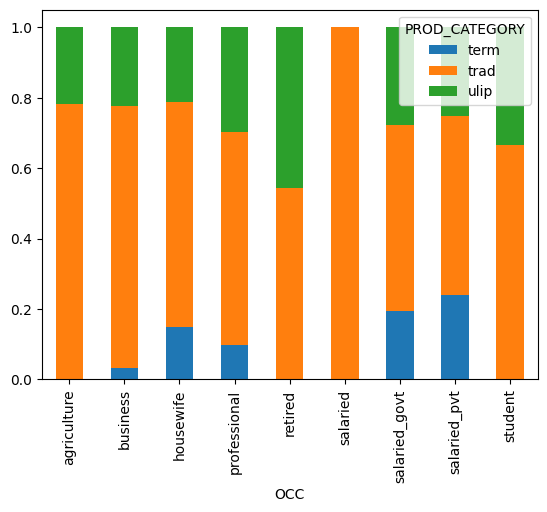

In [52]:
#Analysing Prod_Category Vs OCC
pd.crosstab(df['OCC'], df['PROD_CATEGORY'], normalize='index').plot(kind='bar', stacked=True)

From the above plot it can be seen that traditional type of insurance is the clear favourite across differentt OCccupation groups, <br>
It can be observed that % of ULIP is noticably higher in retired individuals, which might actually be because of misselling as the returns from these tye of products is favourable only if it is held for a longer time duration as it a market linked product and the coverage is linked to market volatility. Ideally ULIPS make sense for  younger individuals. This shows room for insurance companies to avoid mistargeting of customers and having customer value delivery as their objective.

<Axes: xlabel='EDUCATION'>

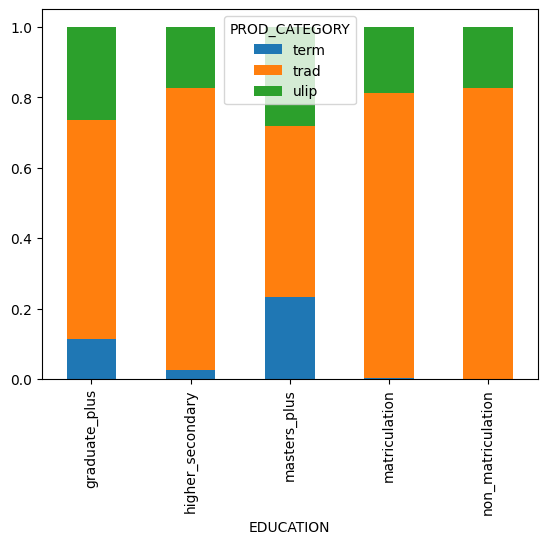

In [53]:
#Analysing Education Vs OCC
pd.crosstab(df['EDUCATION'], df['PROD_CATEGORY'], normalize='index').plot(kind='bar', stacked=True)

From the above plot it can be seen that whhile traditional type of insurance is most common, the % of term insurance and % of ULIP is noticeably higher in the master's plus education category. This might be due to the fact that this group of individuals have higher disposable income and are open to buying different type of insurance products to cover for different requirements.

<Axes: xlabel='PROD_CATEGORY', ylabel='AGE'>

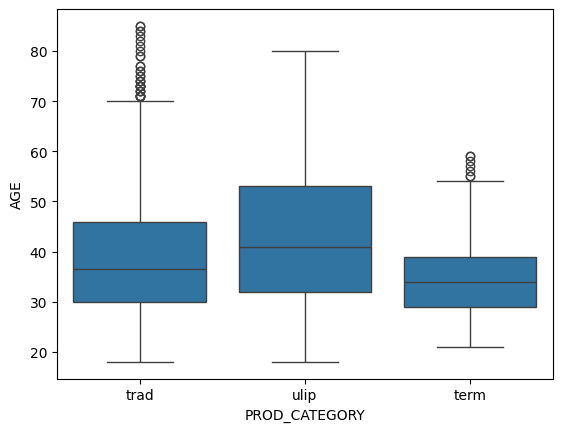

In [54]:
#Product Category Vs Age
sns.boxplot(x='PROD_CATEGORY', y='AGE', data=df)

From the above plot, it can be seen that there is no significant difference in the type of Product purchased and the mean age of the individual.

In [55]:
from scipy.stats import chi2_contingency

contingency = pd.crosstab(df['OCC'], df['PROD_CATEGORY'])
chi2, p, dof, expected = chi2_contingency(contingency)
print(f"p-value: {p}")  # p < 0.05 means significant association

p-value: 2.3446359857715043e-97


From the above Chi square test for association, we see that as the p-value is greater that 0.05, there is no statistical association between Occuaption and the type of product that the customers are making.

# **Calculating the Rolling returns for the duration of the Study for NIFTY-50 and Gold Prices**

In [56]:
df.head()

,ID,AGE,EDUCATION,OCC,PINCODE,PROD_CATEGORY,INCOME_SEGMENT,PROSPERITY_INDEX_BAND,QUALITY_SCORE_BAND,ISSUANCE_MONTH
0,9354,27.0,masters_plus,salaried_pvt,495001.0,trad,5,High,6,Mar-22
1,7823,58.0,graduate_plus,salaried_govt,272001.0,ulip,4,Medium,5,Dec-21
2,6170,52.0,masters_plus,salaried_govt,721101.0,trad,5,High,5,Aug-21
3,9199,52.0,higher_secondary,business,712612.0,trad,3,Medium,2,Mar-22
4,9981,34.0,graduate_plus,salaried_pvt,110085.0,ulip,6,Very_high,6,Mar-22


In [57]:
# prompt: Access the file NIFTY50 file path "/content/drive/MyDrive/Insurance Thesis/Extracted_Data/Nifty50.xlsx" of the NIFTY50

nifty50_df = pd.read_excel("/content/drive/MyDrive/Insurance Thesis/Extracted_Data/Nifty50.xlsx")
print(nifty50_df.head())


        Date     Close
0 2019-01-01  10910.10
1 2019-01-02  10792.50
2 2019-01-03  10672.25
3 2019-01-04  10727.35
4 2019-01-07  10771.80


In [58]:
nifty50_df = pd.read_excel("/content/drive/MyDrive/Insurance Thesis/Extracted_Data/Nifty50.xlsx")
print(nifty50_df.head())


        Date     Close
0 2019-01-01  10910.10
1 2019-01-02  10792.50
2 2019-01-03  10672.25
3 2019-01-04  10727.35
4 2019-01-07  10771.80


In [59]:
nifty50_df.head()

,Date,Close
0,2019-01-01,10910.10
1,2019-01-02,10792.50
2,2019-01-03,10672.25
3,2019-01-04,10727.35
4,2019-01-07,10771.80


In [60]:
nifty50_df = pd.read_excel("/content/drive/MyDrive/Insurance Thesis/Extracted_Data/Nifty50.xlsx", parse_dates=['Date'], date_format='%Y-%m-%d')
print(nifty50_df.head())


                  Date     Close
0  2019-01-01 00:00:00  10910.10
1  2019-01-02 00:00:00  10792.50
2  2019-01-03 00:00:00  10672.25
3  2019-01-04 00:00:00  10727.35
4  2019-01-07 00:00:00  10771.80


In [61]:
# Convert 'Date' column to datetime format and sort the data by date
nifty50_df['Date'] = pd.to_datetime(nifty50_df['Date'])
nifty50_df = nifty50_df.sort_values('Date').reset_index(drop=True)

# Calculate rolling returns for 3, 6, 9, and 12 months (approx 21 trading days per month)
trading_days_per_month = 21
nifty50_df['3M_Rolling_Return'] = nifty50_df['Close'].pct_change(periods=3 * trading_days_per_month)
nifty50_df['6M_Rolling_Return'] = nifty50_df['Close'].pct_change(periods=6 * trading_days_per_month)
nifty50_df['9M_Rolling_Return'] = nifty50_df['Close'].pct_change(periods=9 * trading_days_per_month)
nifty50_df['12M_Rolling_Return'] = nifty50_df['Close'].pct_change(periods=12 * trading_days_per_month)


In [62]:
nifty50_df.head()

,Date,Close,3M_Rolling_Return,6M_Rolling_Return,9M_Rolling_Return,12M_Rolling_Return
0,2019-01-01,10910.10,NaN,NaN,NaN,NaN
1,2019-01-02,10792.50,NaN,NaN,NaN,NaN
2,2019-01-03,10672.25,NaN,NaN,NaN,NaN
3,2019-01-04,10727.35,NaN,NaN,NaN,NaN
4,2019-01-07,10771.80,NaN,NaN,NaN,NaN


In [63]:
nifty50_df[nifty50_df["Date"]== "01-07-2021"]


,Date,Close,3M_Rolling_Return,6M_Rolling_Return,9M_Rolling_Return,12M_Rolling_Return
500,2021-01-07,14137.35,0.204322,0.307386,0.607942,0.178795


In [64]:
# Converting 'Date' column to datetime and sort the data
goldbees_df = pd.read_excel('/content/drive/MyDrive/Insurance Thesis/Extracted_Data/Nifty50.xlsx', sheet_name='GoldBees')
goldbees_df['Date'] = pd.to_datetime(goldbees_df['Date'])
goldbees_df = goldbees_df.sort_values('Date').reset_index(drop=True)


goldbees_df.head()

,Date,Close
0,2019-01-01,28.18
1,2019-01-02,28.29
2,2019-01-03,28.47
3,2019-01-04,28.30
4,2019-01-07,28.22


In [65]:
# Calculate rolling returns for 3, 6, 9, and 12 months (approx 21 trading days per month)
trading_days_per_month = 21
goldbees_df['3M_Rolling_Return'] = goldbees_df['Close'].pct_change(periods=3 * trading_days_per_month)
goldbees_df['6M_Rolling_Return'] = goldbees_df['Close'].pct_change(periods=6 * trading_days_per_month)
goldbees_df['9M_Rolling_Return'] = goldbees_df['Close'].pct_change(periods=9 * trading_days_per_month)
goldbees_df['12M_Rolling_Return'] = goldbees_df['Close'].pct_change(periods=12 * trading_days_per_month)

In [66]:
goldbees_df.head(90)

,Date,Close,3M_Rolling_Return,6M_Rolling_Return,9M_Rolling_Return,12M_Rolling_Return
0,2019-01-01,28.18,NaN,NaN,NaN,NaN
1,2019-01-02,28.29,NaN,NaN,NaN,NaN
2,2019-01-03,28.47,NaN,NaN,NaN,NaN
3,2019-01-04,28.30,NaN,NaN,NaN,NaN
4,2019-01-07,28.22,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
85,2019-05-09,28.12,-0.041908,NaN,NaN,NaN
86,2019-05-10,28.11,-0.046149,NaN,NaN,NaN
87,2019-05-13,28.26,-0.041059,NaN,NaN,NaN
88,2019-05-14,28.55,-0.032531,NaN,NaN,NaN


In [67]:
df.head()

,ID,AGE,EDUCATION,OCC,PINCODE,PROD_CATEGORY,INCOME_SEGMENT,PROSPERITY_INDEX_BAND,QUALITY_SCORE_BAND,ISSUANCE_MONTH
0,9354,27.0,masters_plus,salaried_pvt,495001.0,trad,5,High,6,Mar-22
1,7823,58.0,graduate_plus,salaried_govt,272001.0,ulip,4,Medium,5,Dec-21
2,6170,52.0,masters_plus,salaried_govt,721101.0,trad,5,High,5,Aug-21
3,9199,52.0,higher_secondary,business,712612.0,trad,3,Medium,2,Mar-22
4,9981,34.0,graduate_plus,salaried_pvt,110085.0,ulip,6,Very_high,6,Mar-22


Here the Issuance date is assumed to be the 1st of the month as only Month and Year was provided in the source dataset. Based on this date, the ROlling retruns for 3, 6, 9 and 12 months will be obtained

In [68]:
# Convert ISSUANCE_MONTH to datetime and set day to 1
df['ISSUANCE_DATE'] = pd.to_datetime(df['ISSUANCE_MONTH'], format="%b-%y")  # e.g., Mar-22 → 2022-03-01
df['ISSUANCE_DATE'] = df['ISSUANCE_DATE'].apply(lambda x: x.replace(day=1))

# Preview the updated column
df.head()

,ID,AGE,EDUCATION,OCC,PINCODE,PROD_CATEGORY,INCOME_SEGMENT,PROSPERITY_INDEX_BAND,QUALITY_SCORE_BAND,ISSUANCE_MONTH,ISSUANCE_DATE
0,9354,27.0,masters_plus,salaried_pvt,495001.0,trad,5,High,6,Mar-22,2022-03-01
1,7823,58.0,graduate_plus,salaried_govt,272001.0,ulip,4,Medium,5,Dec-21,2021-12-01
2,6170,52.0,masters_plus,salaried_govt,721101.0,trad,5,High,5,Aug-21,2021-08-01
3,9199,52.0,higher_secondary,business,712612.0,trad,3,Medium,2,Mar-22,2022-03-01
4,9981,34.0,graduate_plus,salaried_pvt,110085.0,ulip,6,Very_high,6,Mar-22,2022-03-01


## Mapping the Respective values of the rolling returns of Nifty 50 to the Issuance month

In [69]:
temp_df = df[df['ISSUANCE_DATE'].isnull()]
temp_df

print(len(df))

4346


In [70]:
# Create a dictionary to map ISSUANCE_DATE to rolling returns
nifty_returns_dict = nifty50_df.set_index('Date')[['3M_Rolling_Return', '6M_Rolling_Return', '9M_Rolling_Return', '12M_Rolling_Return']].to_dict('index')

from datetime import timedelta

def get_nearest_returns_within_tolerance(issuance_date, max_days=7):
    nearest_date = min(
        nifty_returns_dict,
        key=lambda date: abs(date - issuance_date),
        default=None
    )
    if nearest_date and abs(nearest_date - issuance_date) <= timedelta(days=max_days):
        return nifty_returns_dict[nearest_date]
    return {
        '3M_Rolling_Return': None,
        '6M_Rolling_Return': None,
        '9M_Rolling_Return': None,
        '12M_Rolling_Return': None
    }

#Apply matching function to each issuance date
returns_data = [
    get_nearest_returns_within_tolerance(row['ISSUANCE_DATE']) for _, row in df.iterrows()
]

#Confirm lengths match
assert len(df) == len(returns_data), f"Mismatch! df has {len(df)} rows, returns_data has {len(returns_data)}."

#Merge the results back to the original DataFrame
returns_df = pd.DataFrame(returns_data)

# Concatenate with the original DataFrame
df = pd.concat([df.reset_index(drop=True), returns_df.reset_index(drop=True)], axis=1)

In [71]:
print(len(df))

4346


In [72]:
df.head()

,ID,AGE,EDUCATION,OCC,PINCODE,PROD_CATEGORY,INCOME_SEGMENT,PROSPERITY_INDEX_BAND,QUALITY_SCORE_BAND,ISSUANCE_MONTH,ISSUANCE_DATE,3M_Rolling_Return,6M_Rolling_Return,9M_Rolling_Return,12M_Rolling_Return
0,9354,27.0,masters_plus,salaried_pvt,495001.0,trad,5,High,6,Mar-22,2022-03-01,-0.011146,0.005310,0.087994,0.144334
1,7823,58.0,graduate_plus,salaried_govt,272001.0,ulip,4,Medium,5,Dec-21,2021-12-01,0.013930,0.101657,0.167197,0.328044
2,6170,52.0,masters_plus,salaried_govt,721101.0,trad,5,High,5,Aug-21,2021-08-01,0.085485,0.137294,0.349888,0.405697
3,9199,52.0,higher_secondary,business,712612.0,trad,3,Medium,2,Mar-22,2022-03-01,-0.011146,0.005310,0.087994,0.144334
4,9981,34.0,graduate_plus,salaried_pvt,110085.0,ulip,6,Very_high,6,Mar-22,2022-03-01,-0.011146,0.005310,0.087994,0.144334


In [73]:
# Assessing missing return values
missing_counts = df[[
    '3M_Rolling_Return', '6M_Rolling_Return', '9M_Rolling_Return', '12M_Rolling_Return'
]].isna().sum()

print("Remaining missing return values:")
print(missing_counts)

Remaining missing return values:
3M_Rolling_Return     0
6M_Rolling_Return     0
9M_Rolling_Return     0
12M_Rolling_Return    0
dtype: int64


In [74]:

# Check for missing values in each column of the DataFrame 'df'
missing_values = df.isnull().sum()

# Print the number of missing values for each column
print(missing_values)


ID                       0
AGE                      0
EDUCATION                0
OCC                      0
PINCODE                  0
PROD_CATEGORY            0
INCOME_SEGMENT           0
PROSPERITY_INDEX_BAND    0
QUALITY_SCORE_BAND       0
ISSUANCE_MONTH           0
ISSUANCE_DATE            0
3M_Rolling_Return        0
6M_Rolling_Return        0
9M_Rolling_Return        0
12M_Rolling_Return       0
dtype: int64


In [75]:
#Creating a copy of the data frame
temp_df=df
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4346 entries, 0 to 4345
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     4346 non-null   int64         
 1   AGE                    4346 non-null   float64       
 2   EDUCATION              4346 non-null   object        
 3   OCC                    4346 non-null   object        
 4   PINCODE                4346 non-null   object        
 5   PROD_CATEGORY          4346 non-null   object        
 6   INCOME_SEGMENT         4346 non-null   int64         
 7   PROSPERITY_INDEX_BAND  4346 non-null   object        
 8   QUALITY_SCORE_BAND     4346 non-null   int64         
 9   ISSUANCE_MONTH         4346 non-null   object        
 10  ISSUANCE_DATE          4346 non-null   datetime64[ns]
 11  3M_Rolling_Return      4346 non-null   float64       
 12  6M_Rolling_Return      4346 non-null   float64       
 13  9M_



---



## Mapping the Respective values of the rolling returns of Gold to the Issuance month

In [76]:
#Ensure proper datetime format
df['ISSUANCE_DATE'] = pd.to_datetime(df['ISSUANCE_DATE'])
goldbees_df['Date'] = pd.to_datetime(goldbees_df['Date'])

#Create a dictionary to map Date to rolling returns from goldbees
goldbees_returns_dict = goldbees_df.set_index('Date')[
    ['3M_Rolling_Return', '6M_Rolling_Return', '9M_Rolling_Return', '12M_Rolling_Return']
].to_dict('index')

#Function to find nearest date within ±7 days
def get_goldbees_returns_within_tolerance(issuance_date, max_days=7):
    if pd.isnull(issuance_date):
        return {
            'Gold_3M_Rolling_Return': None,
            'Gold_6M_Rolling_Return': None,
            'Gold_9M_Rolling_Return': None,
            'Gold_12M_Rolling_Return': None
        }

    nearest_date = min(
        goldbees_returns_dict,
        key=lambda date: abs(date - issuance_date),
        default=None
    )

    if nearest_date and abs(nearest_date - issuance_date) <= timedelta(days=max_days):
        data = goldbees_returns_dict[nearest_date]
        return {
            'Gold_3M_Rolling_Return': data['3M_Rolling_Return'],
            'Gold_6M_Rolling_Return': data['6M_Rolling_Return'],
            'Gold_9M_Rolling_Return': data['9M_Rolling_Return'],
            'Gold_12M_Rolling_Return': data['12M_Rolling_Return']
        }

    return {
        'Gold_3M_Rolling_Return': None,
        'Gold_6M_Rolling_Return': None,
        'Gold_9M_Rolling_Return': None,
        'Gold_12M_Rolling_Return': None
    }

#Apply the function to each row
gold_returns_data = [
    get_goldbees_returns_within_tolerance(row['ISSUANCE_DATE']) for _, row in df.iterrows()
]

#Convert and merge, ensuring alignment
gold_returns_df = pd.DataFrame(gold_returns_data)
assert len(df) == len(gold_returns_df), "Length mismatch between df and gold_returns_df"
df = pd.concat([df.reset_index(drop=True), gold_returns_df.reset_index(drop=True)], axis=1)

In [77]:

# Check for missing values in each column of the DataFrame 'df'
missing_values = df.isnull().sum()

# Print the number of missing values for each column
print(missing_values)

ID                         0
AGE                        0
EDUCATION                  0
OCC                        0
PINCODE                    0
PROD_CATEGORY              0
INCOME_SEGMENT             0
PROSPERITY_INDEX_BAND      0
QUALITY_SCORE_BAND         0
ISSUANCE_MONTH             0
ISSUANCE_DATE              0
3M_Rolling_Return          0
6M_Rolling_Return          0
9M_Rolling_Return          0
12M_Rolling_Return         0
Gold_3M_Rolling_Return     0
Gold_6M_Rolling_Return     0
Gold_9M_Rolling_Return     0
Gold_12M_Rolling_Return    0
dtype: int64


In [78]:
df.head()

,ID,AGE,EDUCATION,OCC,PINCODE,PROD_CATEGORY,INCOME_SEGMENT,PROSPERITY_INDEX_BAND,QUALITY_SCORE_BAND,ISSUANCE_MONTH,ISSUANCE_DATE,3M_Rolling_Return,6M_Rolling_Return,9M_Rolling_Return,12M_Rolling_Return,Gold_3M_Rolling_Return,Gold_6M_Rolling_Return,Gold_9M_Rolling_Return,Gold_12M_Rolling_Return
0,9354,27.0,masters_plus,salaried_pvt,495001.0,trad,5,High,6,Mar-22,2022-03-01,-0.011146,0.005310,0.087994,0.144334,0.050108,0.066814,0.032449,0.078160
1,7823,58.0,graduate_plus,salaried_govt,272001.0,ulip,4,Medium,5,Dec-21,2021-12-01,0.013930,0.101657,0.167197,0.328044,0.004877,-0.032402,0.013278,-0.060848
2,6170,52.0,masters_plus,salaried_govt,721101.0,trad,5,High,5,Aug-21,2021-08-01,0.085485,0.137294,0.349888,0.405697,0.020644,-0.024201,-0.067789,-0.097370
3,9199,52.0,higher_secondary,business,712612.0,trad,3,Medium,2,Mar-22,2022-03-01,-0.011146,0.005310,0.087994,0.144334,0.050108,0.066814,0.032449,0.078160
4,9981,34.0,graduate_plus,salaried_pvt,110085.0,ulip,6,Very_high,6,Mar-22,2022-03-01,-0.011146,0.005310,0.087994,0.144334,0.050108,0.066814,0.032449,0.078160


In [79]:
# Renaming columns for clarity
df = df.rename(columns={
    '3M_Rolling_Return': 'Nifty_3M_Rolling_Return',
    '6M_Rolling_Return': 'Nifty_6M_Rolling_Return',
    '9M_Rolling_Return': 'Nifty_9M_Rolling_Return',
    '12M_Rolling_Return': 'Nifty_12M_Rolling_Return'
})


In [80]:
df.head()

,ID,AGE,EDUCATION,OCC,PINCODE,PROD_CATEGORY,INCOME_SEGMENT,PROSPERITY_INDEX_BAND,QUALITY_SCORE_BAND,ISSUANCE_MONTH,ISSUANCE_DATE,Nifty_3M_Rolling_Return,Nifty_6M_Rolling_Return,Nifty_9M_Rolling_Return,Nifty_12M_Rolling_Return,Gold_3M_Rolling_Return,Gold_6M_Rolling_Return,Gold_9M_Rolling_Return,Gold_12M_Rolling_Return
0,9354,27.0,masters_plus,salaried_pvt,495001.0,trad,5,High,6,Mar-22,2022-03-01,-0.011146,0.005310,0.087994,0.144334,0.050108,0.066814,0.032449,0.078160
1,7823,58.0,graduate_plus,salaried_govt,272001.0,ulip,4,Medium,5,Dec-21,2021-12-01,0.013930,0.101657,0.167197,0.328044,0.004877,-0.032402,0.013278,-0.060848
2,6170,52.0,masters_plus,salaried_govt,721101.0,trad,5,High,5,Aug-21,2021-08-01,0.085485,0.137294,0.349888,0.405697,0.020644,-0.024201,-0.067789,-0.097370
3,9199,52.0,higher_secondary,business,712612.0,trad,3,Medium,2,Mar-22,2022-03-01,-0.011146,0.005310,0.087994,0.144334,0.050108,0.066814,0.032449,0.078160
4,9981,34.0,graduate_plus,salaried_pvt,110085.0,ulip,6,Very_high,6,Mar-22,2022-03-01,-0.011146,0.005310,0.087994,0.144334,0.050108,0.066814,0.032449,0.078160


With the Above step, the data is ready for modelling and further analysis

# Machine Learning Section

In [81]:
df['PROD_CATEGORY'].value_counts(normalize=True)*100

,proportion
PROD_CATEGORY,
trad,65.439485
ulip,24.643350
term,9.917165


From the above distribution it can be seen that the data set is unbalanced and will need to be handled.

initially, to assess if balancing of the data set actually impacts the accuracy of the ML model, evaluations will be performed on the unbalanced training data. Later after assessing the effect of data balancing. Different models will be developed on the suitable method.

##Data Preparation

In [82]:
#Dropping "ID" column as it does not add any information value.

X = df.drop(['ID', 'PROD_CATEGORY'], axis=1) #Test Dataframe
y = df['PROD_CATEGORY'] #Target Variable

In [83]:
X.head()

,AGE,EDUCATION,OCC,PINCODE,INCOME_SEGMENT,PROSPERITY_INDEX_BAND,QUALITY_SCORE_BAND,ISSUANCE_MONTH,ISSUANCE_DATE,Nifty_3M_Rolling_Return,Nifty_6M_Rolling_Return,Nifty_9M_Rolling_Return,Nifty_12M_Rolling_Return,Gold_3M_Rolling_Return,Gold_6M_Rolling_Return,Gold_9M_Rolling_Return,Gold_12M_Rolling_Return
0,27.0,masters_plus,salaried_pvt,495001.0,5,High,6,Mar-22,2022-03-01,-0.011146,0.005310,0.087994,0.144334,0.050108,0.066814,0.032449,0.078160
1,58.0,graduate_plus,salaried_govt,272001.0,4,Medium,5,Dec-21,2021-12-01,0.013930,0.101657,0.167197,0.328044,0.004877,-0.032402,0.013278,-0.060848
2,52.0,masters_plus,salaried_govt,721101.0,5,High,5,Aug-21,2021-08-01,0.085485,0.137294,0.349888,0.405697,0.020644,-0.024201,-0.067789,-0.097370
3,52.0,higher_secondary,business,712612.0,3,Medium,2,Mar-22,2022-03-01,-0.011146,0.005310,0.087994,0.144334,0.050108,0.066814,0.032449,0.078160
4,34.0,graduate_plus,salaried_pvt,110085.0,6,Very_high,6,Mar-22,2022-03-01,-0.011146,0.005310,0.087994,0.144334,0.050108,0.066814,0.032449,0.078160


In [84]:
y.head()

,PROD_CATEGORY
0,trad
1,ulip
2,trad
3,trad
4,ulip


Handling of the "PINCODE" COlumn

In [85]:
# Count the number of unique PROSPERITY_INDEX_BAND values per PINCODE
pincode_mapping_check = X.groupby('PINCODE')['PROSPERITY_INDEX_BAND'].nunique()

# Filter PINCODEs that have more than one unique mapping
pincode_with_multiple_bands = pincode_mapping_check[pincode_mapping_check > 1]

# Show the result
pincode_with_multiple_bands = pincode_with_multiple_bands.reset_index(name='Unique_Bands_Count')

In [86]:
pincode_with_multiple_bands

,PINCODE,Unique_Bands_Count


As Each value in "PINCODE" has a unoque mapping of "PROSPERITY_INDEX_BAND", we can drop PINCODE


In [87]:
X=X.drop(['PINCODE'], axis=1)

In [88]:
X.head()

,AGE,EDUCATION,OCC,INCOME_SEGMENT,PROSPERITY_INDEX_BAND,QUALITY_SCORE_BAND,ISSUANCE_MONTH,ISSUANCE_DATE,Nifty_3M_Rolling_Return,Nifty_6M_Rolling_Return,Nifty_9M_Rolling_Return,Nifty_12M_Rolling_Return,Gold_3M_Rolling_Return,Gold_6M_Rolling_Return,Gold_9M_Rolling_Return,Gold_12M_Rolling_Return
0,27.0,masters_plus,salaried_pvt,5,High,6,Mar-22,2022-03-01,-0.011146,0.005310,0.087994,0.144334,0.050108,0.066814,0.032449,0.078160
1,58.0,graduate_plus,salaried_govt,4,Medium,5,Dec-21,2021-12-01,0.013930,0.101657,0.167197,0.328044,0.004877,-0.032402,0.013278,-0.060848
2,52.0,masters_plus,salaried_govt,5,High,5,Aug-21,2021-08-01,0.085485,0.137294,0.349888,0.405697,0.020644,-0.024201,-0.067789,-0.097370
3,52.0,higher_secondary,business,3,Medium,2,Mar-22,2022-03-01,-0.011146,0.005310,0.087994,0.144334,0.050108,0.066814,0.032449,0.078160
4,34.0,graduate_plus,salaried_pvt,6,Very_high,6,Mar-22,2022-03-01,-0.011146,0.005310,0.087994,0.144334,0.050108,0.066814,0.032449,0.078160


As The returns based on the Issuance_Date have been deduced earlier we can further drop the "Issuance_Month" and "Issuance_Date" columns.

In [89]:
X=X.drop(['ISSUANCE_MONTH', 'ISSUANCE_DATE'], axis=1)

Converting non-numeric columns into Encoded Values

In [90]:
from sklearn.preprocessing import LabelEncoder

for col in ['EDUCATION', 'OCC', 'PROSPERITY_INDEX_BAND']:
    X[col] = LabelEncoder().fit_transform(X[col])

In [91]:
X.head()

,AGE,EDUCATION,OCC,INCOME_SEGMENT,PROSPERITY_INDEX_BAND,QUALITY_SCORE_BAND,Nifty_3M_Rolling_Return,Nifty_6M_Rolling_Return,Nifty_9M_Rolling_Return,Nifty_12M_Rolling_Return,Gold_3M_Rolling_Return,Gold_6M_Rolling_Return,Gold_9M_Rolling_Return,Gold_12M_Rolling_Return
0,27.0,2,7,5,0,6,-0.011146,0.005310,0.087994,0.144334,0.050108,0.066814,0.032449,0.078160
1,58.0,0,6,4,2,5,0.013930,0.101657,0.167197,0.328044,0.004877,-0.032402,0.013278,-0.060848
2,52.0,2,6,5,0,5,0.085485,0.137294,0.349888,0.405697,0.020644,-0.024201,-0.067789,-0.097370
3,52.0,1,1,3,2,2,-0.011146,0.005310,0.087994,0.144334,0.050108,0.066814,0.032449,0.078160
4,34.0,0,7,6,3,6,-0.011146,0.005310,0.087994,0.144334,0.050108,0.066814,0.032449,0.078160


In [92]:
#Train-Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, test_size=0.2)

In [93]:
print("Train set distribution:\n", y_train.value_counts(normalize=True))
print("\nTest set distribution:\n", y_test.value_counts(normalize=True))

Train set distribution:
 PROD_CATEGORY
trad    0.654488
ulip    0.246260
term    0.099252
Name: proportion, dtype: float64

Test set distribution:
 PROD_CATEGORY
trad    0.654023
ulip    0.247126
term    0.098851
Name: proportion, dtype: float64


# EXP-1: To check the effect of Imbalanced database on the Evaluation Metrics.

In [94]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In the above case RandomForest CLassifier is used as it is more roboust model to build classifier algorithms. This will be used as a baseline for evaluation of the effects balanced Vs imbalanced datasets.

In [95]:
#Make prediction based on the above model for X_test

y_pred = model.predict(X_test)


In [96]:
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_auc_score
)

In [97]:
def evaluate_model(model, X_test, y_test):
    # Make predictions
    y_pred = model.predict(X_test)

    # Accuracy
    acc = accuracy_score(y_test, y_pred)
    print(f"\n🔹 Accuracy: {acc:.4f}")

    # Precision, Recall, F1-score (per class)
    print("\n🔹 Classification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    print("🔹 Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    # AUC Score (macro-average for multiclass)
    try:
        y_prob = model.predict_proba(X_test)
        auc = roc_auc_score(y_test, y_prob, multi_class='ovr', average='macro')
        print(f"\n🔹 AUC (Macro): {auc:.4f}")
    except AttributeError:
        print("\n⚠️ AUC skipped: Model does not support `predict_proba()`")
    except ValueError:
        print("\n⚠️ AUC skipped: Problem with label encoding or insufficient classes")

In [98]:
evaluate_model(model, X_train, y_train)


🔹 Accuracy: 0.9761

🔹 Classification Report:
              precision    recall  f1-score   support

        term       0.98      0.94      0.96       345
        trad       0.98      0.99      0.98      2275
        ulip       0.98      0.95      0.96       856

    accuracy                           0.98      3476
   macro avg       0.98      0.96      0.97      3476
weighted avg       0.98      0.98      0.98      3476

🔹 Confusion Matrix:
[[ 323   17    5]
 [   5 2257   13]
 [   3   40  813]]

🔹 AUC (Macro): 0.9991


In [99]:
evaluate_model(model, X_test, y_test)


🔹 Accuracy: 0.6000

🔹 Classification Report:
              precision    recall  f1-score   support

        term       0.37      0.31      0.34        86
        trad       0.70      0.79      0.74       569
        ulip       0.29      0.21      0.25       215

    accuracy                           0.60       870
   macro avg       0.46      0.44      0.44       870
weighted avg       0.57      0.60      0.58       870

🔹 Confusion Matrix:
[[ 27  39  20]
 [ 30 449  90]
 [ 16 153  46]]

🔹 AUC (Macro): 0.6827


From the above results it can be seen that without balancing of data(the target variable), the test scores significantly decrease compared to the training dataset. This points to the fact that the model trained is not able to generalise the predictions in a generic manner. <n> As a next step the imbalanced target variable will be handled and then evaluated using the same methodology to determine the effect.

## Oversampling, Down Sampling, Synthetic data generation algorithms for Imbalanced dataset handling

**Oversampling(Upsampling of data)**

In [100]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

#Print original class distribution
print("Original training class distribution:", Counter(y_train))


Original training class distribution: Counter({'trad': 2275, 'ulip': 856, 'term': 345})


In [101]:
#Applying Random Oversampling
ros = RandomOverSampler(random_state=50)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

In [102]:
#Print new distribution after resampling
print("Resampled training class distribution:", Counter(y_train_resampled))


Resampled training class distribution: Counter({'ulip': 2275, 'trad': 2275, 'term': 2275})


In [103]:
#Retrain the model
model_Ovr_Sampled=model.fit(X_train_resampled, y_train_resampled)

In [104]:
#Evaluate the model on untouched test set
evaluate_model(model_Ovr_Sampled, X_train_resampled, y_train_resampled)


🔹 Accuracy: 0.9852

🔹 Classification Report:
              precision    recall  f1-score   support

        term       0.98      1.00      0.99      2275
        trad       1.00      0.97      0.98      2275
        ulip       0.98      0.99      0.98      2275

    accuracy                           0.99      6825
   macro avg       0.99      0.99      0.99      6825
weighted avg       0.99      0.99      0.99      6825

🔹 Confusion Matrix:
[[2275    0    0]
 [  22 2205   48]
 [  23    8 2244]]

🔹 AUC (Macro): 0.9991


In [105]:
evaluate_model(model_Ovr_Sampled, X_test, y_test)


🔹 Accuracy: 0.5655

🔹 Classification Report:
              precision    recall  f1-score   support

        term       0.35      0.35      0.35        86
        trad       0.70      0.72      0.71       569
        ulip       0.28      0.26      0.27       215

    accuracy                           0.57       870
   macro avg       0.44      0.44      0.44       870
weighted avg       0.56      0.57      0.56       870

🔹 Confusion Matrix:
[[ 30  34  22]
 [ 39 407 123]
 [ 16 144  55]]

🔹 AUC (Macro): 0.6725


We see from the above results that the improvement has been only marginal, infact the performance of the model has marginally declined as compared to the testing without the imbalance data handling. Thus other methods of imbalanced data handling will be used.

**Downsampling(Under Sampling)**

In [106]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
#Print original class distribution
print("Original training class distribution:", Counter(y_train))

Original training class distribution: Counter({'trad': 2275, 'ulip': 856, 'term': 345})


In [107]:
#Apply Random Undersampling to training data
rus = RandomUnderSampler(random_state=42)
X_train_undersampled, y_train_undersampled = rus.fit_resample(X_train, y_train)

In [108]:
#Print new distribution after resampling
print("Resampled training class distribution:", Counter(y_train_undersampled))

Resampled training class distribution: Counter({'term': 345, 'trad': 345, 'ulip': 345})


In [109]:
#Training the model on the downsampled data
model_undersampled=RandomForestClassifier(random_state=53)
model_undersampled.fit(X_train_undersampled, y_train_undersampled)

RandomForestClassifier(random_state=53)

In [110]:
#Evaluate model on train set
evaluate_model(model_undersampled, X_train_undersampled, y_train_undersampled)


🔹 Accuracy: 0.9894

🔹 Classification Report:
              precision    recall  f1-score   support

        term       0.99      0.99      0.99       345
        trad       0.99      0.99      0.99       345
        ulip       0.99      0.98      0.99       345

    accuracy                           0.99      1035
   macro avg       0.99      0.99      0.99      1035
weighted avg       0.99      0.99      0.99      1035

🔹 Confusion Matrix:
[[342   1   2]
 [  2 343   0]
 [  3   3 339]]

🔹 AUC (Macro): 0.9999


In [111]:
#Evaluate model on test set
evaluate_model(model_undersampled, X_test, y_test)


🔹 Accuracy: 0.5069

🔹 Classification Report:
              precision    recall  f1-score   support

        term       0.29      0.65      0.40        86
        trad       0.77      0.52      0.62       569
        ulip       0.31      0.41      0.35       215

    accuracy                           0.51       870
   macro avg       0.45      0.53      0.46       870
weighted avg       0.61      0.51      0.53       870

🔹 Confusion Matrix:
[[ 56  11  19]
 [ 91 297 181]
 [ 49  78  88]]

🔹 AUC (Macro): 0.6910


Though the AUC score marginally increased, but still the difference between Train and test score is significant, this shows that the model has not been able to make a good generalisation when predicting on the test set.

**Synthetic Data Generation: SMOTE (Synthetic Minority Over-sampling Technique)**

In [112]:
from imblearn.over_sampling import SMOTE
from collections import Counter

#Print class distribution before SMOTE
print("Original training class distribution:", Counter(y_train))

#Applying SMOTE only to training data
smote = SMOTE(random_state=55)
X_train_SMOTEsampled, y_train_SMOTEsampled = smote.fit_resample(X_train, y_train)

Original training class distribution: Counter({'trad': 2275, 'ulip': 856, 'term': 345})


In [113]:
#Print new class distribution
print("Resampled training class distribution (SMOTE):", Counter(y_train_SMOTEsampled))

Resampled training class distribution (SMOTE): Counter({'ulip': 2275, 'trad': 2275, 'term': 2275})


In [114]:
#ReTraining the model
model_SMOTEsampled=RandomForestClassifier(random_state=55)
model_SMOTEsampled.fit(X_train_SMOTEsampled, y_train_SMOTEsampled)

RandomForestClassifier(random_state=55)

In [115]:
#Evaluate on the training set
evaluate_model(model_SMOTEsampled, X_train_SMOTEsampled, y_train_SMOTEsampled)


🔹 Accuracy: 0.9875

🔹 Classification Report:
              precision    recall  f1-score   support

        term       1.00      0.99      0.99      2275
        trad       0.98      0.99      0.98      2275
        ulip       0.99      0.98      0.99      2275

    accuracy                           0.99      6825
   macro avg       0.99      0.99      0.99      6825
weighted avg       0.99      0.99      0.99      6825

🔹 Confusion Matrix:
[[2254   16    5]
 [   7 2250   18]
 [   3   36 2236]]

🔹 AUC (Macro): 0.9996


In [116]:
#Evaluate on the test set
evaluate_model(model_SMOTEsampled, X_test, y_test)


🔹 Accuracy: 0.5989

🔹 Classification Report:
              precision    recall  f1-score   support

        term       0.41      0.34      0.37        86
        trad       0.70      0.78      0.74       569
        ulip       0.28      0.21      0.24       215

    accuracy                           0.60       870
   macro avg       0.47      0.44      0.45       870
weighted avg       0.57      0.60      0.58       870

🔹 Confusion Matrix:
[[ 29  35  22]
 [ 26 446  97]
 [ 15 154  46]]

🔹 AUC (Macro): 0.6737




---



**ADASYN- Adaptive Synthetic Sampling**<br>
Focuses on Generating more synthetic data in regions where the minority class is harder to learn (i.e., near the class boundary).

In [117]:
from imblearn.over_sampling import ADASYN

adasyn = ADASYN(random_state=55)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)

In [118]:
#Print new class distribution
print("Resampled training class distribution (SMOTE):", Counter(y_train_adasyn))

Resampled training class distribution (SMOTE): Counter({'trad': 2275, 'term': 2242, 'ulip': 2119})


In [119]:
#ReTraining the model
model_ADASYN=RandomForestClassifier(random_state=42)
model_ADASYN.fit(X_train_adasyn, y_train_adasyn)

RandomForestClassifier(random_state=42)

In [120]:
#Evaluate on the training set
evaluate_model(model_ADASYN, X_train_adasyn, y_train_adasyn)


🔹 Accuracy: 0.9872

🔹 Classification Report:
              precision    recall  f1-score   support

        term       0.99      0.99      0.99      2242
        trad       0.98      0.99      0.98      2275
        ulip       0.99      0.98      0.99      2119

    accuracy                           0.99      6636
   macro avg       0.99      0.99      0.99      6636
weighted avg       0.99      0.99      0.99      6636

🔹 Confusion Matrix:
[[2224   14    4]
 [   9 2251   15]
 [   5   38 2076]]

🔹 AUC (Macro): 0.9997


In [121]:
#Evaluate on the test set
evaluate_model(model_ADASYN, X_test, y_test)


🔹 Accuracy: 0.5874

🔹 Classification Report:
              precision    recall  f1-score   support

        term       0.39      0.30      0.34        86
        trad       0.69      0.77      0.73       569
        ulip       0.27      0.22      0.24       215

    accuracy                           0.59       870
   macro avg       0.45      0.43      0.44       870
weighted avg       0.56      0.59      0.57       870

🔹 Confusion Matrix:
[[ 26  41  19]
 [ 26 438 105]
 [ 15 153  47]]

🔹 AUC (Macro): 0.6718



**Technique: AUC Score**<br>
Random Over Sampling: 0.6725 <br>
Random Down Sampling: 0.6910<br>
SMOTE Sampling: 0.6737<br>
ADASYN Sampling: 0.6718

From the above results of AUC scores for different types of imbalanced dataset handling we see that Down Sampling Performed the best, but if this method is utilised there may be loss of information value given the size of the dataset, this study will utilise the SMOTE Sampling method



---



# Exp-2: Evaluating DIfferent Machine Learning Models

## **Logistic Regression**

### Exp-2a: Checking the effect of Correlation among the Predictor Variables

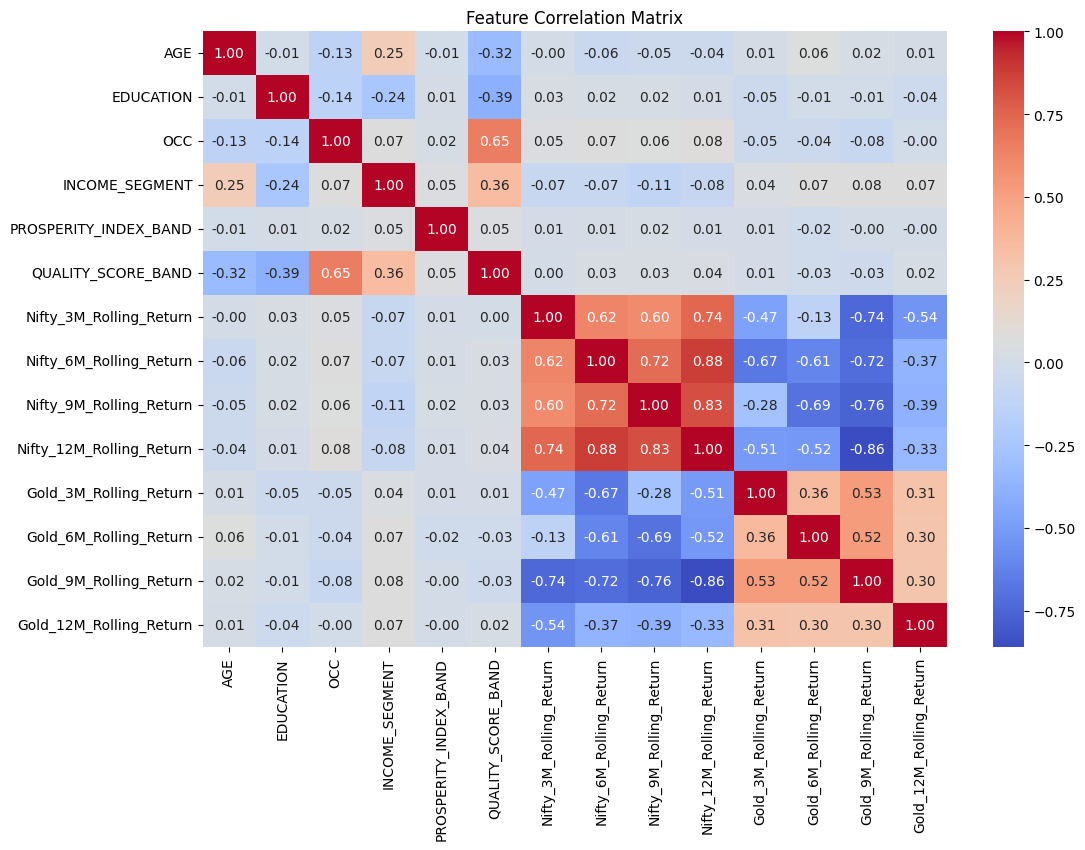

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = X_train.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

In [123]:
X_train_logreg=X_train_SMOTEsampled.drop('Gold_9M_Rolling_Return', axis=1)


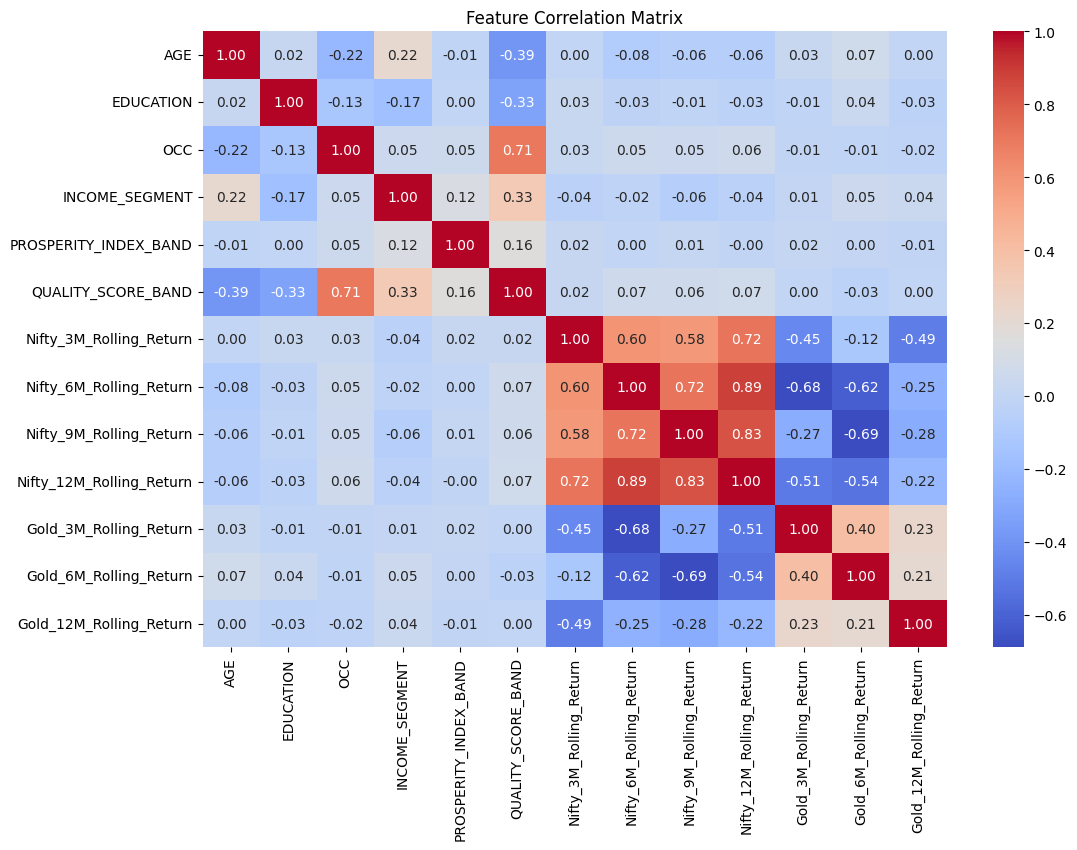

In [124]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = X_train_logreg.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

In [125]:
X_train_logreg=X_train_SMOTEsampled.drop(['Gold_9M_Rolling_Return','Nifty_12M_Rolling_Return'], axis=1)
X_test_logreg = X_test.drop(['Gold_9M_Rolling_Return','Nifty_12M_Rolling_Return'],axis=1)

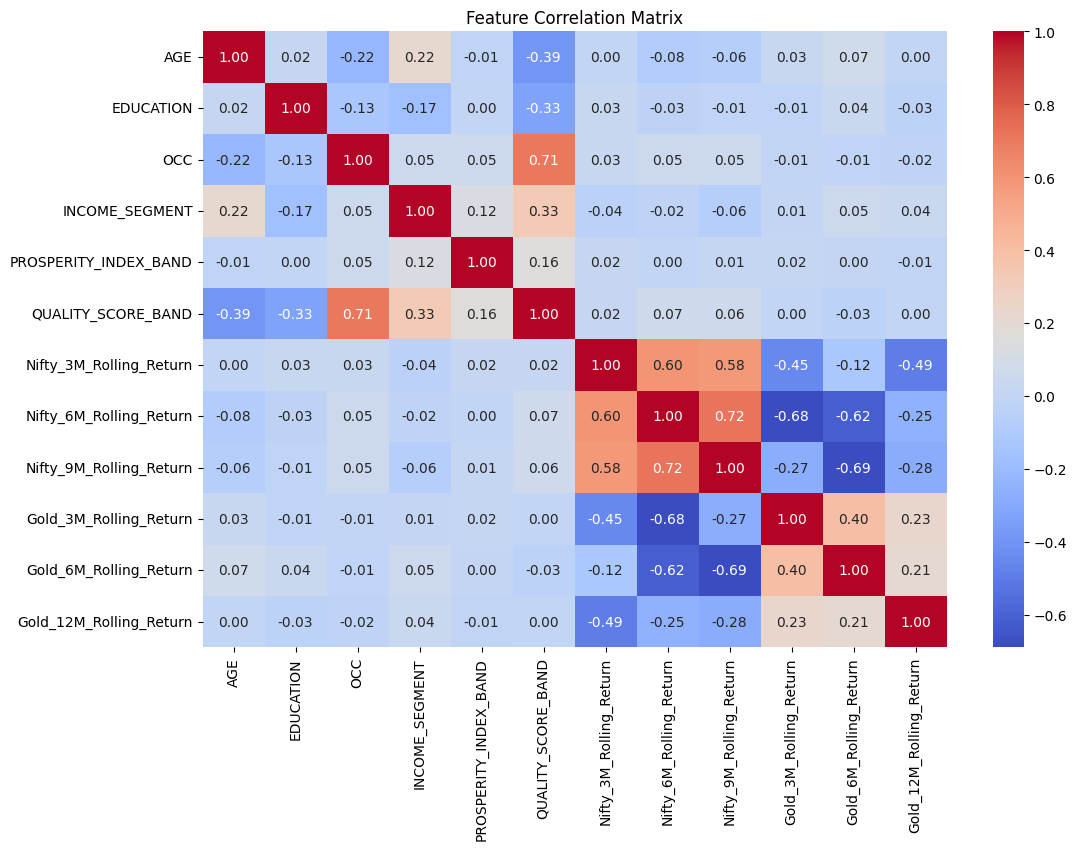

In [126]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = X_train_logreg.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

As the Correlation is handled, logistic regression model can now be built for the classification.

In [127]:
from sklearn.preprocessing import StandardScaler


#Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_logreg)
X_test_scaled = scaler.transform(X_test_logreg)

In [128]:
from sklearn.linear_model import LogisticRegression


#Initialize the model
logreg_model = LogisticRegression(max_iter=1500, solver='lbfgs', multi_class='multinomial', random_state=42)


#Train on SMOTE-sampled data
logreg_model.fit(X_train_scaled, y_train_SMOTEsampled)

#Evaluate on train set
evaluate_model(logreg_model, X_train_scaled, y_train_SMOTEsampled)


🔹 Accuracy: 0.5893

🔹 Classification Report:
              precision    recall  f1-score   support

        term       0.62      0.78      0.69      2275
        trad       0.60      0.54      0.57      2275
        ulip       0.53      0.45      0.49      2275

    accuracy                           0.59      6825
   macro avg       0.58      0.59      0.58      6825
weighted avg       0.58      0.59      0.58      6825

🔹 Confusion Matrix:
[[1775  171  329]
 [ 463 1219  593]
 [ 607  640 1028]]

🔹 AUC (Macro): 0.7571


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [129]:
len(X_test_scaled)

870

In [130]:
len(y_test)

870

In [131]:
#Evaluate on test set
evaluate_model(logreg_model, X_test_scaled, y_test)


🔹 Accuracy: 0.5011

🔹 Classification Report:
              precision    recall  f1-score   support

        term       0.30      0.80      0.43        86
        trad       0.76      0.50      0.60       569
        ulip       0.32      0.39      0.35       215

    accuracy                           0.50       870
   macro avg       0.46      0.56      0.46       870
weighted avg       0.60      0.50      0.52       870

🔹 Confusion Matrix:
[[ 69  11   6]
 [112 283 174]
 [ 52  79  84]]

🔹 AUC (Macro): 0.7124


In [132]:
from sklearn.preprocessing import StandardScaler


#Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_SMOTEsampled)
X_test_scaled = scaler.transform(X_test)

In [133]:
from sklearn.linear_model import LogisticRegression


#Initialize the model
logreg_model = LogisticRegression(max_iter=1500, solver='lbfgs', multi_class='multinomial', random_state=42)


#Train on SMOTE-sampled data
logreg_model.fit(X_train_scaled, y_train_SMOTEsampled)

#Evaluate on train set
evaluate_model(logreg_model, X_train_scaled, y_train_SMOTEsampled)


🔹 Accuracy: 0.5933

🔹 Classification Report:


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


              precision    recall  f1-score   support

        term       0.62      0.79      0.70      2275
        trad       0.61      0.53      0.57      2275
        ulip       0.53      0.46      0.49      2275

    accuracy                           0.59      6825
   macro avg       0.59      0.59      0.59      6825
weighted avg       0.59      0.59      0.59      6825

🔹 Confusion Matrix:
[[1798  161  316]
 [ 472 1209  594]
 [ 607  626 1042]]

🔹 AUC (Macro): 0.7588


In [134]:
#Evaluate on test set
evaluate_model(logreg_model, X_test_scaled, y_test)


🔹 Accuracy: 0.5207

🔹 Classification Report:
              precision    recall  f1-score   support

        term       0.30      0.81      0.44        86
        trad       0.78      0.52      0.62       569
        ulip       0.34      0.41      0.37       215

    accuracy                           0.52       870
   macro avg       0.47      0.58      0.48       870
weighted avg       0.62      0.52      0.54       870

🔹 Confusion Matrix:
[[ 70  10   6]
 [111 295 163]
 [ 54  73  88]]

🔹 AUC (Macro): 0.7110


From the above test and train results we see that the AUC score is 0.7110 amd 0.7568 respectively, indicating that there is not much difference between the test set and training set evaluation. This means that the logistic regresion model was able to better generalise the predictions.

Also we see that the correlation among the predictor variables did not alter the prediction capabilit of the model in intself though it resulted in faster convergence and also prevents the possibility of overfitting, hence for analysis further models all columns will be retained for modelling.



---



## Decision Trees

In [135]:
from sklearn.tree import DecisionTreeClassifier

#Initialize the Decision Tree model
tree_model = DecisionTreeClassifier(random_state=55)

#Train on SMOTE-resampled training set
tree_model.fit(X_train_SMOTEsampled, y_train_SMOTEsampled)

# Evaluate on the original (untouched) test set
evaluate_model(tree_model, X_train_SMOTEsampled, y_train_SMOTEsampled)


🔹 Accuracy: 0.9877

🔹 Classification Report:
              precision    recall  f1-score   support

        term       0.99      1.00      0.99      2275
        trad       0.98      0.99      0.98      2275
        ulip       1.00      0.98      0.99      2275

    accuracy                           0.99      6825
   macro avg       0.99      0.99      0.99      6825
weighted avg       0.99      0.99      0.99      6825

🔹 Confusion Matrix:
[[2274    0    1]
 [  23 2247    5]
 [   7   48 2220]]

🔹 AUC (Macro): 0.9998


In [136]:
# Evaluate on the original (untouched) test set
evaluate_model(tree_model, X_test, y_test)


🔹 Accuracy: 0.5483

🔹 Classification Report:
              precision    recall  f1-score   support

        term       0.35      0.35      0.35        86
        trad       0.71      0.67      0.69       569
        ulip       0.27      0.31      0.29       215

    accuracy                           0.55       870
   macro avg       0.44      0.44      0.44       870
weighted avg       0.56      0.55      0.55       870

🔹 Confusion Matrix:
[[ 30  32  24]
 [ 34 381 154]
 [ 22 127  66]]

🔹 AUC (Macro): 0.5739


From the above it can be seen that decision tree algorithm performed poorly as the test score of AUC fell drastically, thus it's hyperparameter needs to be tuned.

###**Hyper Parameter Tuning of Decision Trees**

In [137]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}


grid = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    scoring='roc_auc',
    cv=5,
    verbose=1
)


grid.fit(X_train_SMOTEsampled, y_train_SMOTEsampled)
print("Best params:", grid.best_params_)

# Evaluate best model
best_tree = grid.best_estimator_
evaluate_model(best_tree, X_test, y_test)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


Streaming output truncated to the last 5000 lines.
ValueError: multi_class must be in ('ovo', 'ovr')

  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_scorer.py", line 388, in _score
    return self._sign * self._score_func(y

Best params: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}

🔹 Accuracy: 0.5632

🔹 Classification Report:
              precision    recall  f1-score   support

        term       0.31      0.81      0.45        86
        trad       0.77      0.63      0.69       569
        ulip       0.35      0.29      0.32       215

    accuracy                           0.56       870
   macro avg       0.48      0.58      0.49       870
weighted avg       0.62      0.56      0.57       870

🔹 Confusion Matrix:
[[ 70  10   6]
 [101 358 110]
 [ 54  99  62]]

🔹 AUC (Macro): 0.7105


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_scorer.py", line 388, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/us

From the above results, it can be seen that the
Best parameters for Decision Tree algorithm is as follows <br>'criterion': 'gini',<br> 'max_depth': 5,<br> 'min_samples_leaf': 1,<br> 'min_samples_split': 2

THe AUC_Score now increased to 0.7105 as compared to the earlier 0.5739 without hyperparameter tuning

## Random Forest Classifier

In [138]:
#Initialize the Random Forest model with default settings
rf_model = RandomForestClassifier(random_state=55)

#Fit the model on SMOTE-resampled training data
rf_model.fit(X_train_SMOTEsampled, y_train_SMOTEsampled)

#Evaluate the model on the original test data
evaluate_model(rf_model, X_train_SMOTEsampled, y_train_SMOTEsampled)


🔹 Accuracy: 0.9875

🔹 Classification Report:
              precision    recall  f1-score   support

        term       1.00      0.99      0.99      2275
        trad       0.98      0.99      0.98      2275
        ulip       0.99      0.98      0.99      2275

    accuracy                           0.99      6825
   macro avg       0.99      0.99      0.99      6825
weighted avg       0.99      0.99      0.99      6825

🔹 Confusion Matrix:
[[2254   16    5]
 [   7 2250   18]
 [   3   36 2236]]

🔹 AUC (Macro): 0.9996


In [139]:
#Evaluate the model on the original test data
evaluate_model(rf_model, X_test, y_test)


🔹 Accuracy: 0.5989

🔹 Classification Report:
              precision    recall  f1-score   support

        term       0.41      0.34      0.37        86
        trad       0.70      0.78      0.74       569
        ulip       0.28      0.21      0.24       215

    accuracy                           0.60       870
   macro avg       0.47      0.44      0.45       870
weighted avg       0.57      0.60      0.58       870

🔹 Confusion Matrix:
[[ 29  35  22]
 [ 26 446  97]
 [ 15 154  46]]

🔹 AUC (Macro): 0.6737


From the above results it can be observed that the AUC score decreases significantly for the test set. It can be concluded that there is room for parameter tuning to improve the performance of the model.

###Hyperparameter tuning for Random Forest Classifier

In [140]:
#Defining the hyperparameter grid
param_grid = {
    'n_estimators': [25,50,100],
    'max_depth': [10, 15],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'criterion': ['gini', 'entropy']
}

#Set up GridSearchCV with AUC scoring (multi-class)
grid = GridSearchCV(
    estimator=RandomForestClassifier(random_state=55),
    param_grid=param_grid,
    scoring='roc_auc_ovr',   # for multi-class AUC
    cv=5,
    verbose=2,
    n_jobs=-1
)

# Step 3: Fit on SMOTE-resampled training data
grid.fit(X_train_SMOTEsampled, y_train_SMOTEsampled)

# Step 4: Print best hyperparameters
print("Best parameters found:", grid.best_params_)

# Step 5: Evaluate best model on original test set
best_rf_model = grid.best_estimator_
evaluate_model(best_rf_model, X_test, y_test)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best parameters found: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

🔹 Accuracy: 0.6138

🔹 Classification Report:
              precision    recall  f1-score   support

        term       0.41      0.44      0.42        86
        trad       0.70      0.80      0.75       569
        ulip       0.31      0.19      0.23       215

    accuracy                           0.61       870
   macro avg       0.47      0.48      0.47       870
weighted avg       0.58      0.61      0.59       870

🔹 Confusion Matrix:
[[ 38  35  13]
 [ 36 456  77]
 [ 19 156  40]]

🔹 AUC (Macro): 0.6989


We see that the Best parameters for the Random Foressst CLassifier as determined by Grid Search is:<br>'criterion': 'entropy',<br> 'max_depth': 15,<br>'min_samples_leaf': 1, <br>'min_samples_split': 2,<br> 'n_estimators': 100


Also the  AUC Score increased to **0.6989** after the model's hyperparameters were tuned.

##XG Boost

In [141]:
# Encode target labels once
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train_SMOTEsampled)
y_test_encoded = label_encoder.transform(y_test)  # test set too is included as XG Boost requires encoded target Variables

In [142]:
from xgboost import XGBClassifier

#Initialize the XGBoost model with default settings
xgb_model = XGBClassifier(
    objective='multi:softprob',     # multi-class classification
    eval_metric='mlogloss',         # recommended for multi-class
    use_label_encoder=False,        # suppresses label encoder warning
    random_state=42
)

#Fit on SMOTE-resampled training data
xgb_model.fit(X_train_SMOTEsampled, y_train_encoded)

#Evaluate on the train set
evaluate_model(xgb_model, X_train_SMOTEsampled, y_train_encoded)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:00:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



🔹 Accuracy: 0.9304

🔹 Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      2275
           1       0.88      0.95      0.91      2275
           2       0.97      0.86      0.91      2275

    accuracy                           0.93      6825
   macro avg       0.93      0.93      0.93      6825
weighted avg       0.93      0.93      0.93      6825

🔹 Confusion Matrix:
[[2220   40   15]
 [  57 2163   55]
 [  53  255 1967]]

🔹 AUC (Macro): 0.9911


In [143]:
#Evaluate on the original (untouched) test set
evaluate_model(xgb_model, X_test, y_test_encoded)


🔹 Accuracy: 0.6299

🔹 Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.47      0.46        86
           1       0.72      0.81      0.76       569
           2       0.34      0.23      0.27       215

    accuracy                           0.63       870
   macro avg       0.51      0.50      0.50       870
weighted avg       0.60      0.63      0.61       870

🔹 Confusion Matrix:
[[ 40  32  14]
 [ 28 459  82]
 [ 19 147  49]]

🔹 AUC (Macro): 0.7157


It can be observed that the AUC Score without any Hyper pArameter tuning is 0.7157. but is a significant decline as compared to the train set AUC score. Thus the model can be tuned further.

### XG Boost Hyper Parameter Tuning

In [144]:
# Define the parameter grid
param_grid = {
    'n_estimators': [25, 50, 100],
    'max_depth': [2, 3, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 1],
    'reg_lambda': [1, 10]
}

# Set up GridSearchCV with AUC for multi-class
grid = GridSearchCV(
    estimator=XGBClassifier(
        objective='multi:softprob',
        eval_metric='mlogloss',
        use_label_encoder=False,
        random_state=55
    ),
    param_grid=param_grid,
    scoring='roc_auc_ovr',
    cv=3,  # can increase to 5 if time allows
    verbose=2,
    n_jobs=-1
)

# Fit the model on SMOTE-resampled training data
grid.fit(X_train_SMOTEsampled, y_train_encoded)

# Print best hyperparameters
print("Best parameters found:", grid.best_params_)

#Evaluate best model on original test set
best_xgb_model = grid.best_estimator_
evaluate_model(best_xgb_model, X_test, y_test_encoded)

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:03:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters found: {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100, 'reg_lambda': 1, 'subsample': 0.8}

🔹 Accuracy: 0.6356

🔹 Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.53      0.49        86
           1       0.72      0.80      0.76       569
           2       0.36      0.23      0.28       215

    accuracy                           0.64       870
   macro avg       0.51      0.52      0.51       870
weighted avg       0.61      0.64      0.62       870

🔹 Confusion Matrix:
[[ 46  32   8]
 [ 32 458  79]
 [ 22 144  49]]

🔹 AUC (Macro): 0.7278


Post Fine Tuning, the best parameters as determined by grid serach are as follows:<br>'colsample_bytree': 1.0,<br> 'gamma': 0,<br> 'learning_rate': 0.2,<br> 'max_depth': 5,<br> 'n_estimators': 100,<br> 'reg_lambda': 1,<br> 'subsample': 0.8


Also the AUC_Score marginally increased to 0.7278 as compared to without fine tuning

## Neural Network

In [145]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report


# Scale the features (required for Neural Nets)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_SMOTEsampled)
X_test_scaled = scaler.transform(X_test)

# Initialize the Neural Network model
mlp = MLPClassifier(
    hidden_layer_sizes=(50,50),  # can change for different configurations (50, 50), (128, 64, 32), etc.
    activation='relu',
    solver='adam',
    max_iter=300,
    random_state=42
)

#Train the model
mlp.fit(X_train_scaled, y_train_SMOTEsampled)

#Predict and evaluate
y_pred = mlp.predict(X_test_scaled)

# Use your existing evaluation function if compatible
evaluate_model(mlp, X_train_scaled, y_train_SMOTEsampled)


🔹 Accuracy: 0.8459

🔹 Classification Report:
              precision    recall  f1-score   support

        term       0.89      0.92      0.90      2275
        trad       0.83      0.81      0.82      2275
        ulip       0.81      0.81      0.81      2275

    accuracy                           0.85      6825
   macro avg       0.85      0.85      0.85      6825
weighted avg       0.85      0.85      0.85      6825

🔹 Confusion Matrix:
[[2095   75  105]
 [ 121 1841  313]
 [ 146  292 1837]]

🔹 AUC (Macro): 0.9575


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [146]:
# Use your existing evaluation function if compatible
evaluate_model(mlp, X_test_scaled, y_test)


🔹 Accuracy: 0.5563

🔹 Classification Report:
              precision    recall  f1-score   support

        term       0.32      0.37      0.34        86
        trad       0.71      0.67      0.69       569
        ulip       0.30      0.33      0.31       215

    accuracy                           0.56       870
   macro avg       0.44      0.46      0.45       870
weighted avg       0.57      0.56      0.56       870

🔹 Confusion Matrix:
[[ 32  36  18]
 [ 41 381 147]
 [ 27 117  71]]

🔹 AUC (Macro): 0.6787


We see that without fine tunng the Neural Network was able to obtain an AUC Score of 0.6787. However there is room to improve the performance by finetuning.

### Hyper Parameter Tuning for Neural Network

In [147]:
# Set up parameter grid for tuning
param_grid = {
    'hidden_layer_sizes': [(32,32), (64,64), (128, 64)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001],                   # L2 regularization
    'learning_rate_init': [0.001, 0.01],
    'solver': ['adam']                          # 'adam' is generally best for NN
}

grid = GridSearchCV(
    estimator=mlp,
    param_grid=param_grid,
    scoring='roc_auc_ovr',          # Use AUC for multi-class
    cv=3,                           # 3-fold cross-validation
    verbose=2,                      # Show progress
    n_jobs=-1                       # Use all CPU cores
)


#Fit the grid search
grid.fit(X_train_scaled, y_train_SMOTEsampled)

# Step 6: Show best parameters
print("Best parameters found:", grid.best_params_)

#Evaluate best model on scaled test set
best_mlp_model = grid.best_estimator_
evaluate_model(best_mlp_model, X_test_scaled, y_test)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best parameters found: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (128, 64), 'learning_rate_init': 0.001, 'solver': 'adam'}

🔹 Accuracy: 0.5805

🔹 Classification Report:
              precision    recall  f1-score   support

        term       0.32      0.47      0.38        86
        trad       0.71      0.73      0.72       569
        ulip       0.30      0.23      0.26       215

    accuracy                           0.58       870
   macro avg       0.45      0.47      0.45       870
weighted avg       0.57      0.58      0.57       870

🔹 Confusion Matrix:
[[ 40  30  16]
 [ 56 416  97]
 [ 29 137  49]]

🔹 AUC (Macro): 0.6844


Post Fine Tuning, the best parameters as determined by grid serach are as follows:<br>'activation': 'relu',<br> 'alpha': 0.0001,<br> 'hidden_layer_sizes': (128, 64),<br> 'learning_rate_init': 0.001,<br> 'solver': 'adam'

Also the AUC_Score marginally increased to 0.6844 as compared to without fine tuning

# Models Saved

In [148]:
import joblib

joblib.dump(logreg_model, 'logreg_model.pkl')
joblib.dump(best_rf_model, 'random_forest_model.pkl')
joblib.dump(best_xgb_model, 'xgboost_model.pkl')
joblib.dump(best_tree, 'decision_tree_tuned.pkl')
joblib.dump(best_mlp_model, 'mlp_model_tuned.pkl')

['mlp_model_tuned.pkl']

# Deriving insights from the ML models Developed

## For Decision Trees

In [149]:
import joblib

#Loading the saved model pipeline
decisionTree_model = joblib.load('/content/drive/MyDrive/Insurance Thesis/Best_Model_Dump/decision_tree_tuned.pkl')

In [150]:
import pandas as pd

# Assuming your model is trained and your features are in X_train
importances = decisionTree_model.feature_importances_
features = X_train.columns if hasattr(X_train, 'columns') else [f'Feature_{i}' for i in range(X_train.shape[1])]
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)
print(importance_df)

                     Feature  Importance
5         QUALITY_SCORE_BAND    0.442072
0                        AGE    0.152297
3             INCOME_SEGMENT    0.148144
2                        OCC    0.050149
11    Gold_6M_Rolling_Return    0.040119
8    Nifty_9M_Rolling_Return    0.036338
6    Nifty_3M_Rolling_Return    0.034021
1                  EDUCATION    0.032147
7    Nifty_6M_Rolling_Return    0.031270
13   Gold_12M_Rolling_Return    0.022385
9   Nifty_12M_Rolling_Return    0.011058
4      PROSPERITY_INDEX_BAND    0.000000
10    Gold_3M_Rolling_Return    0.000000
12    Gold_9M_Rolling_Return    0.000000


##For  Logistic Regression

In [151]:
#Loading the saved model pipeline
logreg_model = joblib.load('/content/drive/MyDrive/Insurance Thesis/Best_Model_Dump/logreg_model.pkl')

In [152]:
import numpy as np

coefs = logreg_model.coef_[0]  # For binary classification
features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Coefficient': coefs}).sort_values(by='Coefficient', key=np.abs, ascending=False)
print(importance_df)

                     Feature  Coefficient
5         QUALITY_SCORE_BAND     0.618366
3             INCOME_SEGMENT     0.330998
2                        OCC     0.316048
0                        AGE    -0.246201
12    Gold_9M_Rolling_Return     0.230085
9   Nifty_12M_Rolling_Return     0.214242
8    Nifty_9M_Rolling_Return     0.187099
6    Nifty_3M_Rolling_Return    -0.180251
1                  EDUCATION    -0.165045
10    Gold_3M_Rolling_Return    -0.140721
7    Nifty_6M_Rolling_Return     0.138598
4      PROSPERITY_INDEX_BAND    -0.081734
11    Gold_6M_Rolling_Return    -0.022028
13   Gold_12M_Rolling_Return    -0.015745


## For Neural Networks

In [153]:
#Loading the saved model pipeline
mlp_model = joblib.load('/content/drive/MyDrive/Insurance Thesis/Best_Model_Dump/mlp_model_tuned.pkl')

In [154]:
from sklearn.preprocessing import StandardScaler
# Scale the features (required for Neural Nets)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_SMOTEsampled)
X_test_scaled = scaler.transform(X_test)

In [155]:
from sklearn.inspection import permutation_importance

result = permutation_importance(mlp_model, X_test_scaled, y_test, n_repeats=10, random_state=42)
importance_df = pd.DataFrame({'Feature': X_test.columns, 'Importance': result.importances_mean*100})
print(importance_df.sort_values(by='Importance', ascending=False))

                     Feature    Importance
6    Nifty_3M_Rolling_Return  1.509195e+01
12    Gold_9M_Rolling_Return  1.068966e+01
11    Gold_6M_Rolling_Return  9.873563e+00
13   Gold_12M_Rolling_Return  9.402299e+00
9   Nifty_12M_Rolling_Return  7.517241e+00
8    Nifty_9M_Rolling_Return  6.160920e+00
10    Gold_3M_Rolling_Return  5.287356e+00
0                        AGE  3.379310e+00
5         QUALITY_SCORE_BAND  2.149425e+00
3             INCOME_SEGMENT  1.034483e+00
1                  EDUCATION  1.839080e-01
7    Nifty_6M_Rolling_Return -1.110223e-15
2                        OCC -3.448276e-02
4      PROSPERITY_INDEX_BAND -1.425287e+00


## For Random Forest

In [156]:
#Loading the saved model pipeline
rf_model = joblib.load('/content/drive/MyDrive/Insurance Thesis/Best_Model_Dump/random_forest_model.pkl')

In [157]:
# Get feature importances from the trained Random Forest model
rf_importance = rf_model.feature_importances_

# Map to feature names
rf_importance_df = pd.DataFrame({
    'Feature': X_train_SMOTEsampled.columns,
    'Importance': rf_importance
}).sort_values(by='Importance', ascending=False)

print("Random Forest Feature Importance:")
print(rf_importance_df)

Random Forest Feature Importance:
                     Feature  Importance
0                        AGE    0.188197
3             INCOME_SEGMENT    0.119355
5         QUALITY_SCORE_BAND    0.107514
2                        OCC    0.088994
13   Gold_12M_Rolling_Return    0.059833
7    Nifty_6M_Rolling_Return    0.057280
6    Nifty_3M_Rolling_Return    0.054182
9   Nifty_12M_Rolling_Return    0.050273
10    Gold_3M_Rolling_Return    0.048759
8    Nifty_9M_Rolling_Return    0.047796
4      PROSPERITY_INDEX_BAND    0.047749
11    Gold_6M_Rolling_Return    0.046634
1                  EDUCATION    0.041951
12    Gold_9M_Rolling_Return    0.041484


## For XG Boost

In [158]:
#Loading the saved model pipeline
XGBoost_model = joblib.load('/content/drive/MyDrive/Insurance Thesis/Best_Model_Dump/xgboost_model.pkl')

In [159]:
# For XGBoost model
xgb_importance = XGBoost_model.feature_importances_

xgb_importance_df = pd.DataFrame({
    'Feature': X_train_SMOTEsampled.columns,
    'Importance': xgb_importance
}).sort_values(by='Importance', ascending=False)

print("XGBoost Feature Importance:")
print(xgb_importance_df)

XGBoost Feature Importance:
                     Feature  Importance
5         QUALITY_SCORE_BAND    0.198693
11    Gold_6M_Rolling_Return    0.086168
13   Gold_12M_Rolling_Return    0.081824
7    Nifty_6M_Rolling_Return    0.074250
6    Nifty_3M_Rolling_Return    0.074101
10    Gold_3M_Rolling_Return    0.068346
9   Nifty_12M_Rolling_Return    0.066097
8    Nifty_9M_Rolling_Return    0.065839
3             INCOME_SEGMENT    0.061216
12    Gold_9M_Rolling_Return    0.052933
2                        OCC    0.051323
0                        AGE    0.047016
1                  EDUCATION    0.038882
4      PROSPERITY_INDEX_BAND    0.033312


/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


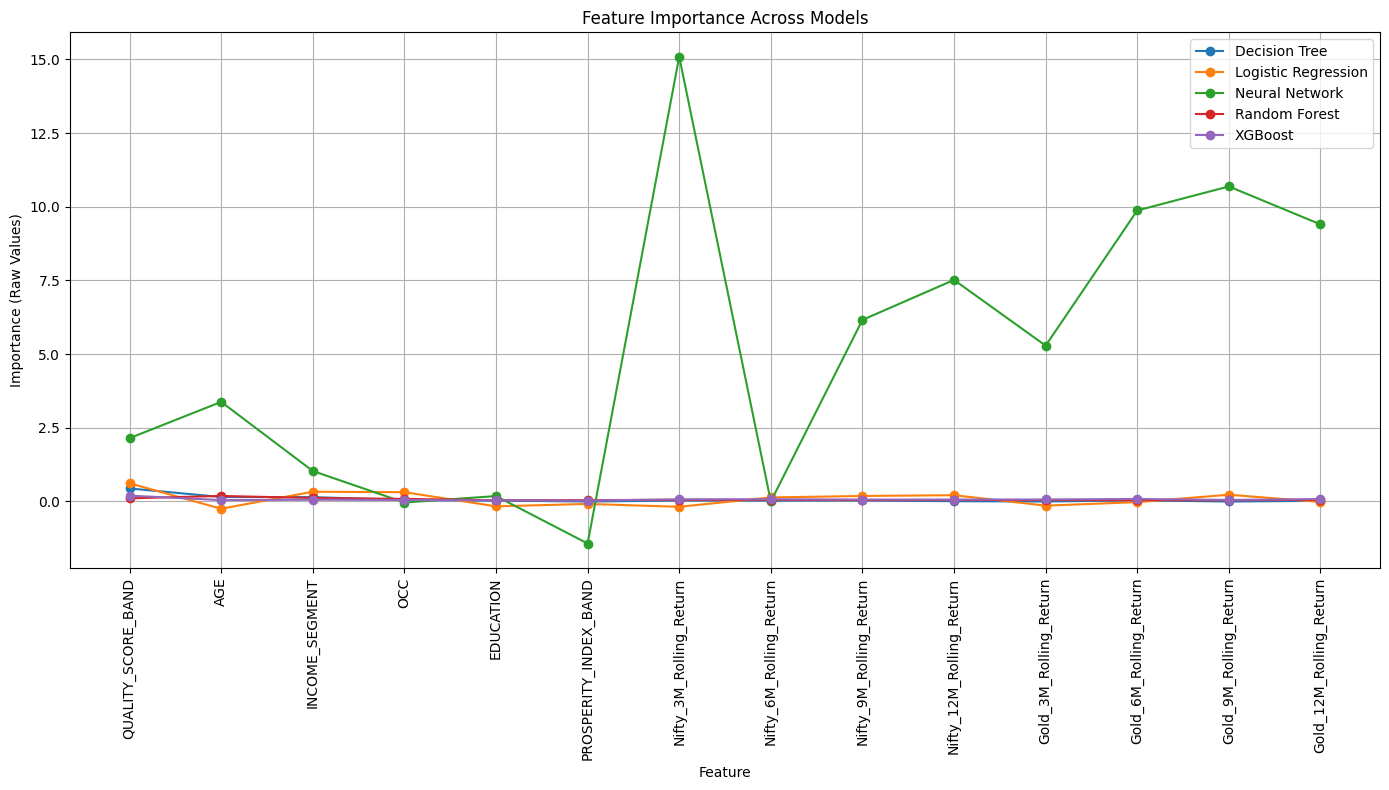

In [160]:
# Constructing the combined feature importance DataFrame
combined_df = pd.DataFrame({
    'Feature': [
        'QUALITY_SCORE_BAND', 'AGE', 'INCOME_SEGMENT', 'OCC', 'EDUCATION',
        'PROSPERITY_INDEX_BAND', 'Nifty_3M_Rolling_Return', 'Nifty_6M_Rolling_Return',
        'Nifty_9M_Rolling_Return', 'Nifty_12M_Rolling_Return', 'Gold_3M_Rolling_Return',
        'Gold_6M_Rolling_Return', 'Gold_9M_Rolling_Return', 'Gold_12M_Rolling_Return'
    ],
    'Decision Tree': [0.442072, 0.152297, 0.148144, 0.050149, 0.032147, 0.000000,
                      0.034021, 0.031270, 0.036338, 0.011058, 0.000000, 0.040119, 0.000000, 0.022385],
    'Logistic Regression': [0.618366, -0.246201, 0.330998, 0.316048, -0.165045, -0.081734,
                            -0.180251, 0.138598, 0.187099, 0.214242, -0.140721, -0.022028, 0.230085, -0.015745],
    'Neural Network': [2.149425, 3.379310, 1.034483, -0.034483, 0.183908, -1.425287,
                       15.091950, -1.110223e-15, 6.160920, 7.517241, 5.287356, 9.873563, 10.689660, 9.402299],
    'Random Forest': [0.107514, 0.188197, 0.119355, 0.088994, 0.041951, 0.047749,
                      0.054182, 0.057280, 0.047796, 0.050273, 0.048759, 0.046634, 0.041484, 0.059833],
    'XGBoost': [0.198693, 0.047016, 0.061216, 0.051323, 0.038882, 0.033312,
                0.074101, 0.074250, 0.065839, 0.066097, 0.068346, 0.086168, 0.052933, 0.081824]
})

# Melt the DataFrame for line plot
melted_df = combined_df.melt(id_vars='Feature', var_name='Model', value_name='Importance')
melted_df["LogImportance"] = np.log(melted_df["Importance"])

# Plot feature importance across models
plt.figure(figsize=(14, 8))
for model in melted_df['Model'].unique():
    subset = melted_df[melted_df['Model'] == model]
    plt.plot(subset['Feature'], subset['Importance'], marker='o', label=model)

plt.xticks(rotation=90)
plt.title("Feature Importance Across Models")
plt.xlabel("Feature")
plt.ylabel("Importance (Raw Values)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


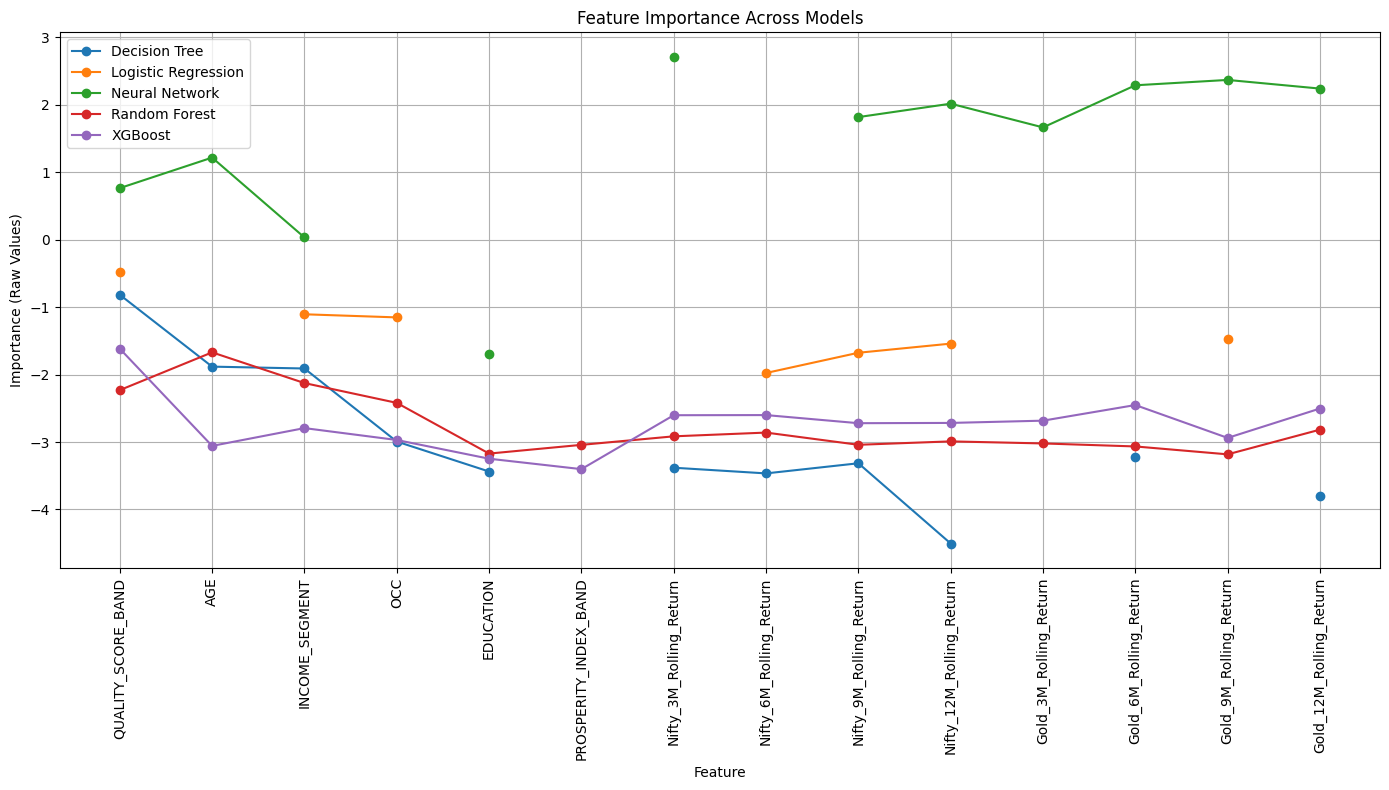

In [161]:
# Constructing the combined feature importance DataFrame
combined_df = pd.DataFrame({
    'Feature': [
        'QUALITY_SCORE_BAND', 'AGE', 'INCOME_SEGMENT', 'OCC', 'EDUCATION',
        'PROSPERITY_INDEX_BAND', 'Nifty_3M_Rolling_Return', 'Nifty_6M_Rolling_Return',
        'Nifty_9M_Rolling_Return', 'Nifty_12M_Rolling_Return', 'Gold_3M_Rolling_Return',
        'Gold_6M_Rolling_Return', 'Gold_9M_Rolling_Return', 'Gold_12M_Rolling_Return'
    ],
    'Decision Tree': [0.442072, 0.152297, 0.148144, 0.050149, 0.032147, 0.000000,
                      0.034021, 0.031270, 0.036338, 0.011058, 0.000000, 0.040119, 0.000000, 0.022385],
    'Logistic Regression': [0.618366, -0.246201, 0.330998, 0.316048, -0.165045, -0.081734,
                            -0.180251, 0.138598, 0.187099, 0.214242, -0.140721, -0.022028, 0.230085, -0.015745],
    'Neural Network': [2.149425, 3.379310, 1.034483, -0.034483, 0.183908, -1.425287,
                       15.091950, -1.110223e-15, 6.160920, 7.517241, 5.287356, 9.873563, 10.689660, 9.402299],
    'Random Forest': [0.107514, 0.188197, 0.119355, 0.088994, 0.041951, 0.047749,
                      0.054182, 0.057280, 0.047796, 0.050273, 0.048759, 0.046634, 0.041484, 0.059833],
    'XGBoost': [0.198693, 0.047016, 0.061216, 0.051323, 0.038882, 0.033312,
                0.074101, 0.074250, 0.065839, 0.066097, 0.068346, 0.086168, 0.052933, 0.081824]
})

# Melt the DataFrame for line plot
melted_df = combined_df.melt(id_vars='Feature', var_name='Model', value_name='Importance')
melted_df["LogImportance"] = np.log(melted_df["Importance"])

# Plot feature importance across models
plt.figure(figsize=(14, 8))
for model in melted_df['Model'].unique():
    subset = melted_df[melted_df['Model'] == model]
    plt.plot(subset['Feature'], subset['LogImportance'], marker='o', label=model)

plt.xticks(rotation=90)
plt.title("Feature Importance Across Models")
plt.xlabel("Feature")
plt.ylabel("Importance (Raw Values)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


##Conclusion/Inference

Conclusion/Inference from the above Feature Importance Analysis:
1. From the above it canbe seen that QUALITY_SCORE_BAND, AGE, and INCOME_SEGMENT stand out as robust drivers across almost all models.

2. Nifty/Gold Returns are Less important in tree and logistic models. But are Highly valued in Neural Networks and XGBoost, suggesting non-linear or interaction effects.

3. PROSPERITY_INDEX_BAND and EDUCATION show consistently low importance, even negative in some.





---



In [162]:
# Set up parameter grid for tuning
param_grid = {
    'hidden_layer_sizes': [(32,32), (64,64), (128, 64)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001],                   # L2 regularization
    'learning_rate_init': [0.001, 0.01],
    'solver': ['adam']                          # 'adam' is generally best for NN
}

grid = GridSearchCV(
    estimator=mlp,
    param_grid=param_grid,
    scoring='roc_auc_ovr',          # Use AUC for multi-class
    cv=3,                           # 3-fold cross-validation
    verbose=2,                      # Show progress
    n_jobs=-1                       # Use all CPU cores
)


#Fit the grid search
grid.fit(X_train_scaled, y_train_SMOTEsampled)

# Step 6: Show best parameters
print("Best parameters found:", grid.best_params_)

#Evaluate best model on scaled test set
best_mlp_model = grid.best_estimator_
evaluate_model(best_mlp_model, X_test_scaled, y_test)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best parameters found: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (128, 64), 'learning_rate_init': 0.001, 'solver': 'adam'}

🔹 Accuracy: 0.5805

🔹 Classification Report:
              precision    recall  f1-score   support

        term       0.32      0.47      0.38        86
        trad       0.71      0.73      0.72       569
        ulip       0.30      0.23      0.26       215

    accuracy                           0.58       870
   macro avg       0.45      0.47      0.45       870
weighted avg       0.57      0.58      0.57       870

🔹 Confusion Matrix:
[[ 40  30  16]
 [ 56 416  97]
 [ 29 137  49]]

🔹 AUC (Macro): 0.6844
